# Performance measures

## Medidas
OSPA (optimal sub-pattern assignment) - Distancia entredos  conjuntos  de  puntos, orientada a algoritmos de detección y tracking.

JSC Tracks - Coeficiente se similitud de Jaccard en el tracking.

JSC Positions - Coeficiente  se  similitud  de  Jaccard  en  la  deteccion.

$JSC = \frac{TP}{TP + TN +FN}$


## Resúmen

En general los algoritmos con mejor desempeño son el GNN (Global Nearest Neighbors), y el ENNJPDAF, la modificación de que propone Urbano sobre el JPDAF. Ambos métodos tienen resultados muy similares.

Con respecto al desempeño en función de la frecuencia de adquisición, todos los algoritmos presentaron un comportamiento similar. A 6Hz se obtubieron resultados muy malos pero para el resto de las pruebas la frecuencia no parece ser un factor demasiado importante.

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120

In [41]:
datasets_dir = 'error_results/dataset_29_8_2020'
files = sorted(os.listdir(datasets_dir))
files = [file for file in files if file.split(sep='.')[-1] == 'csv']
frecuencies = ['6Hz', '15Hz', '20Hz', '30Hz', '40Hz', '60Hz']
frecuencies_num = [int(frec[:-2]) for frec in frecuencies]
algorithms = ['NN', 'GNN', 'PDAF', 'JPDAF', 'ENNJPDAF']

# print('files:', files)
# print('frecuencies: ',frecuencies)
# print('frecuencies_num: ',frecuencies_num)
# print('algorithms: ', algorithms)

In [42]:
datasets = []
for file in files:
    tracks = pd.read_csv(os.path.join(datasets_dir, file), index_col=0)
    datasets.append(tracks)
# tracks.head()

In [50]:
datasets_results = []
for k, results in enumerate(datasets):
    results_att_sort = []
    for att in algorithms: 
        idxs = [idx for idx in results.index if att == idx.split(sep='_')[1]]
        results_att = results.loc[idxs, :]
        results_att['Dataset'] = k + 1
        results_att['Algorithm'] = att
        results_att_sort.append(results_att)

    for i, results_att in enumerate(results_att_sort):
        for idx in results_att.index:
            frec = idx.split(sep='_')[0]
            frec = frec[:-2]
            results_att.loc[idx, 'Frecuency'] = int(frec) 
    datasets_results.append(results_att_sort)
# results_att.head()

In [44]:
results_conctat = pd.DataFrame(columns=results_att.columns)
for k, results in enumerate(datasets_results):
    for i, results_att in enumerate(results):
        results_conctat = pd.concat((results_conctat, results_att))
# print(results_conctat.shape)
# results_conctat.head()

## Evolución promedio de la OSPA con la frecuencia



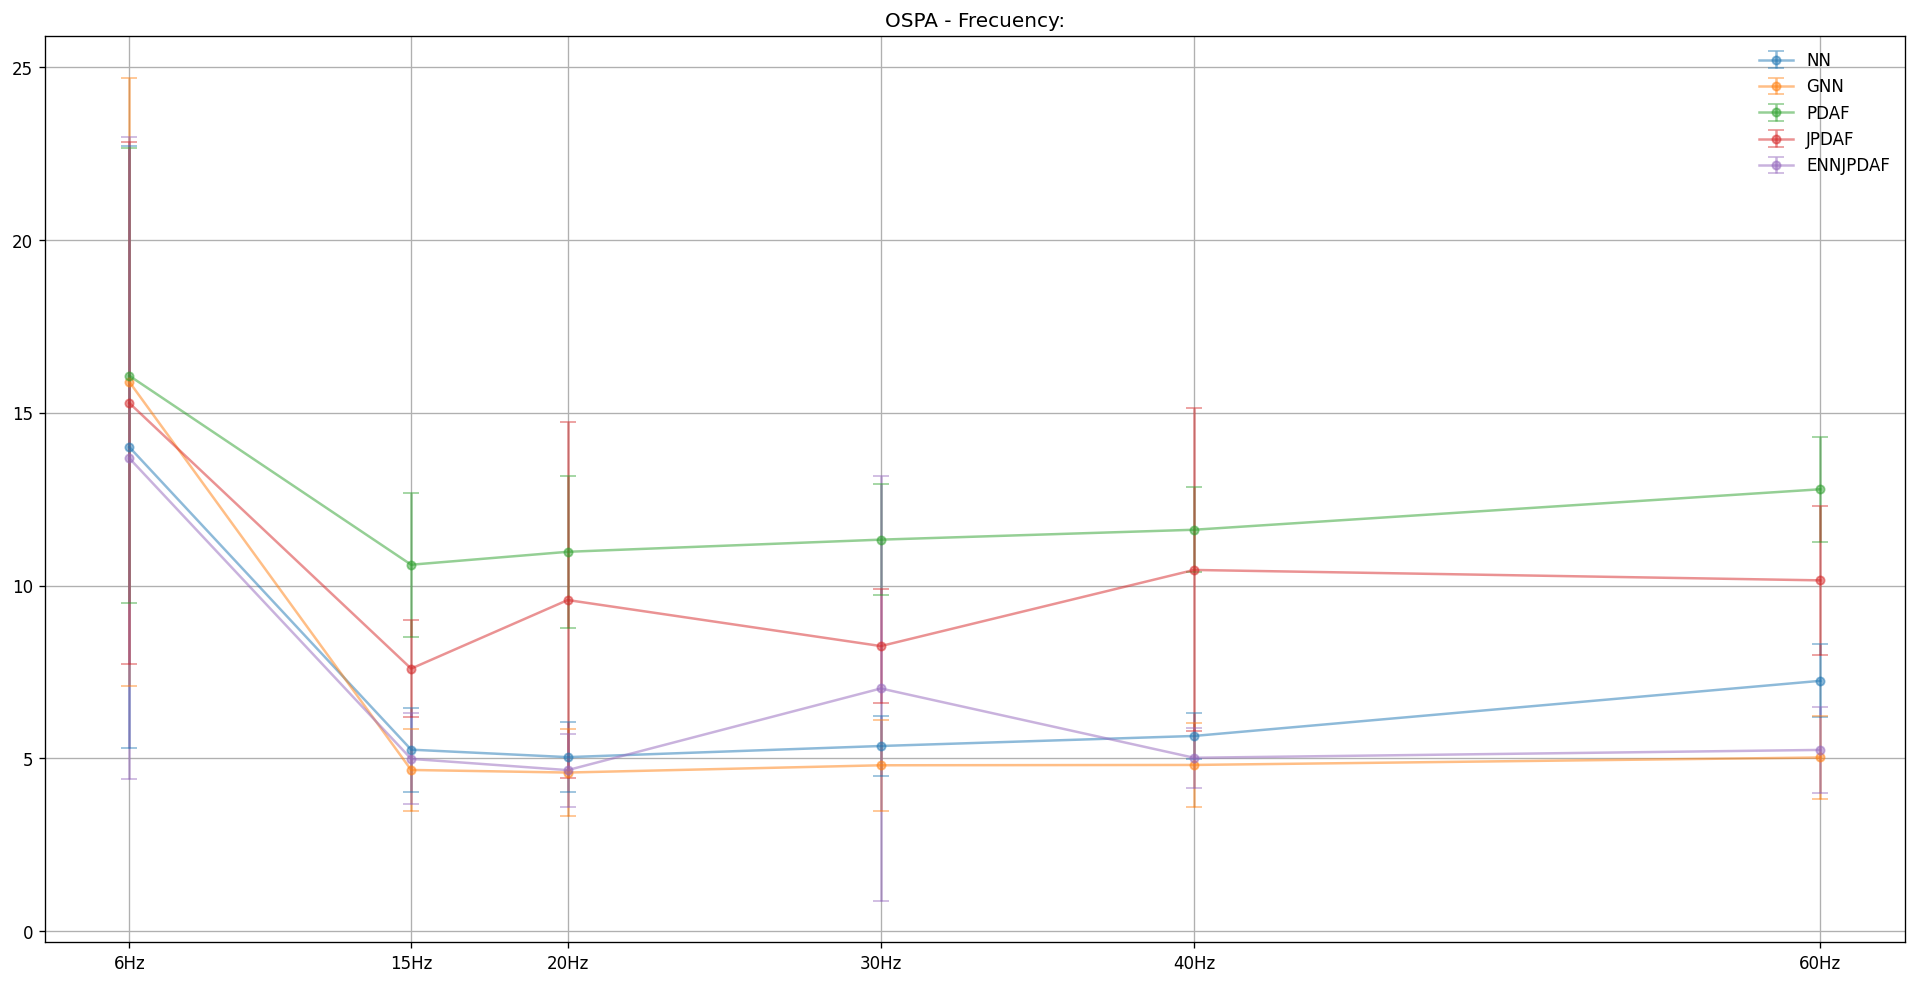

In [47]:
results_groups = results_conctat.groupby('Algorithm')
os.makedirs(os.path.join(datasets_dir, 'mean'), exist_ok=True)

plt.figure(figsize=(20, 10))
for att in algorithms:
    result = results_groups.get_group(att)
    global_mean = result.groupby('Frecuency').mean()
    global_std = result.groupby('Frecuency').std()
    plt.errorbar(global_result.index, global_mean['OSPA'], global_std['OSPA'], marker='o', markersize=5, 
                 label=att, alpha=0.5, mew=1, capsize=5)
plt.legend(frameon=False)
plt.grid()
plt.xticks(frecuencies_num, frecuencies) 
plt.title('OSPA - Frecuency:')
plt.savefig(os.path.join(datasets_dir, 'mean', 'OSPA.png'))
plt.show()

## Evolución promedio de JSC Tracks con la frecuencia

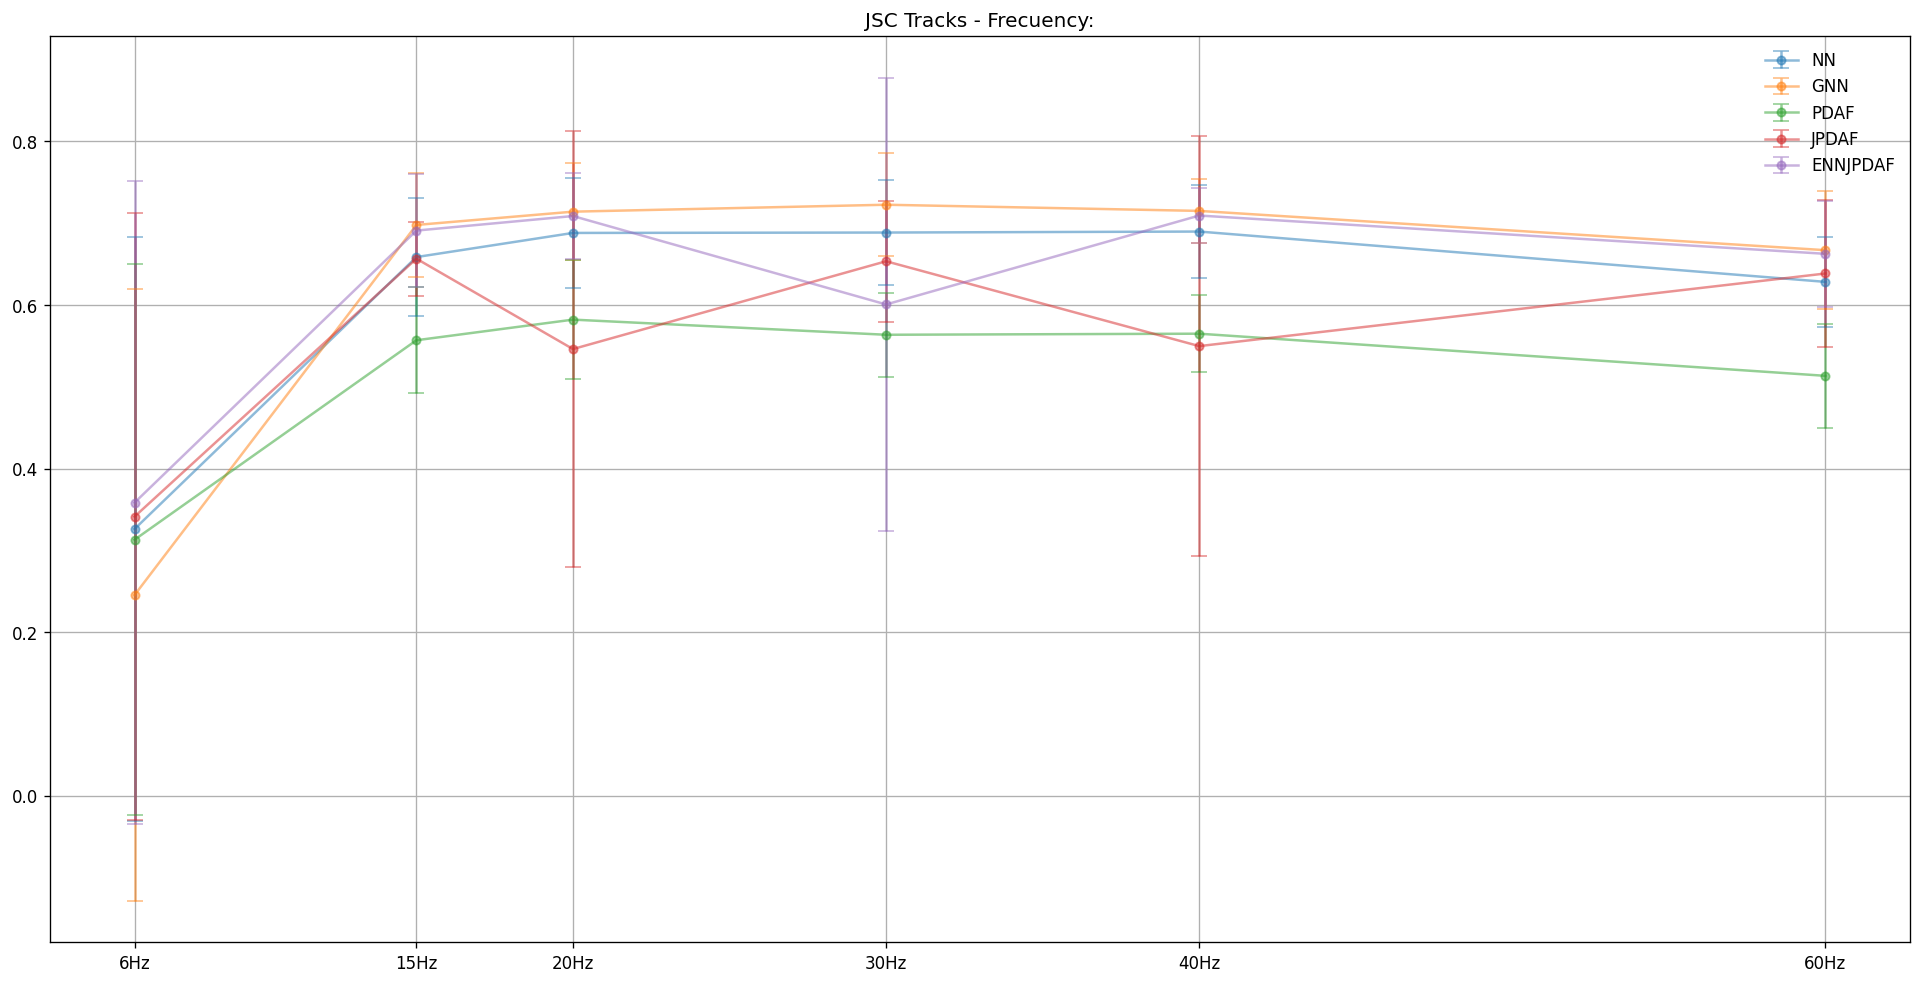

In [48]:
plt.figure(figsize=(20, 10))
for att in algorithms:
    result = results_groups.get_group(att)
    global_mean = result.groupby('Frecuency').mean()
    global_std = result.groupby('Frecuency').std()
    plt.errorbar(global_result.index, global_mean['JSC Tracks'], global_std['JSC Tracks'], marker='o',
                 markersize=5, label=att, alpha=0.5, mew=1, capsize=5)
plt.legend(frameon=False)
plt.grid()
plt.xticks(frecuencies_num, frecuencies) 
plt.title('JSC Tracks - Frecuency:')
plt.savefig(os.path.join(datasets_dir, 'mean', 'JSC_Tracks.png'))
plt.show()

## Evolución promedio de JSC Positions con la frecuencia

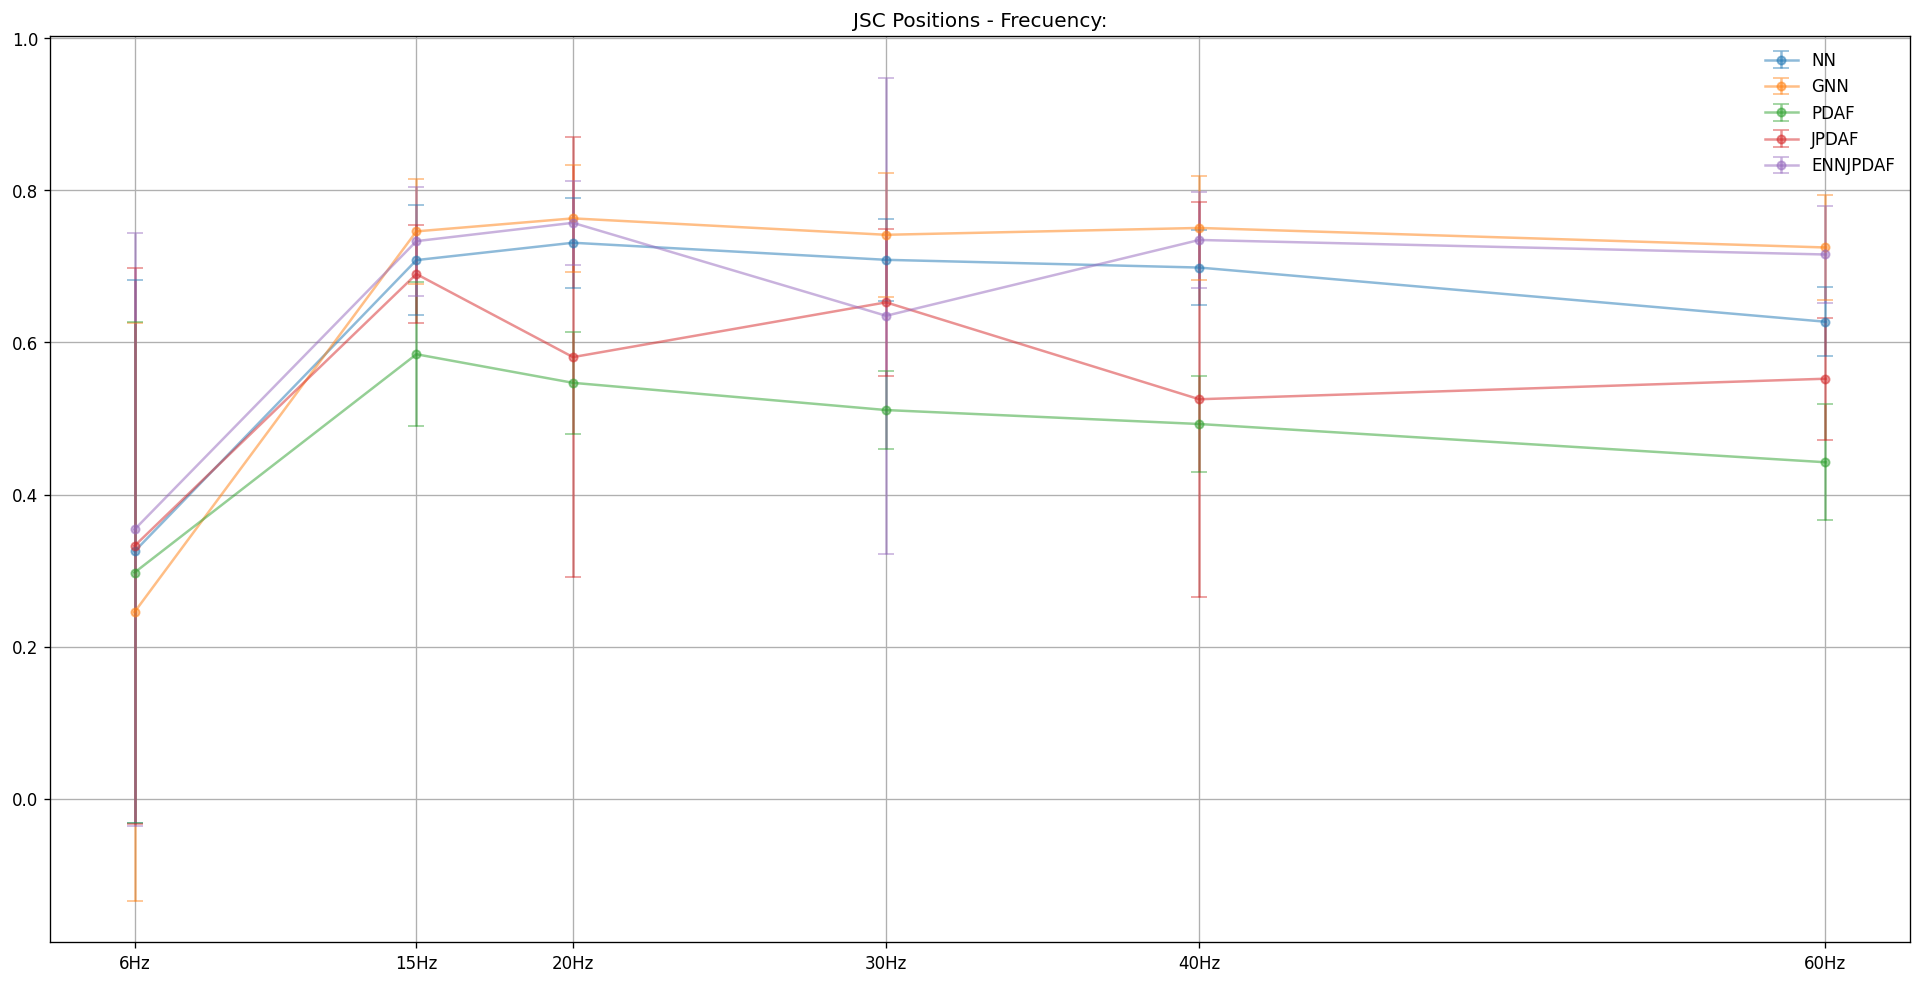

In [49]:
plt.figure(figsize=(20, 10))
for att in algorithms:
    result = results_groups.get_group(att)
    global_mean = result.groupby('Frecuency').mean()
    global_std = result.groupby('Frecuency').std()
    plt.errorbar(global_result.index, global_mean['JSC Positions'], global_std['JSC Positions'], marker='o',
                 markersize=5, label=att, alpha=0.5, mew=1, capsize=5)
plt.legend(frameon=False)
plt.grid()
plt.xticks(frecuencies_num, frecuencies) 
plt.title('JSC Positions - Frecuency:')
plt.savefig(os.path.join(datasets_dir, 'mean', 'JSC_Positions.png'))
plt.show()

# Resultados para todas las pruebas

### OSPA

dataset_1_performance_measures.csv


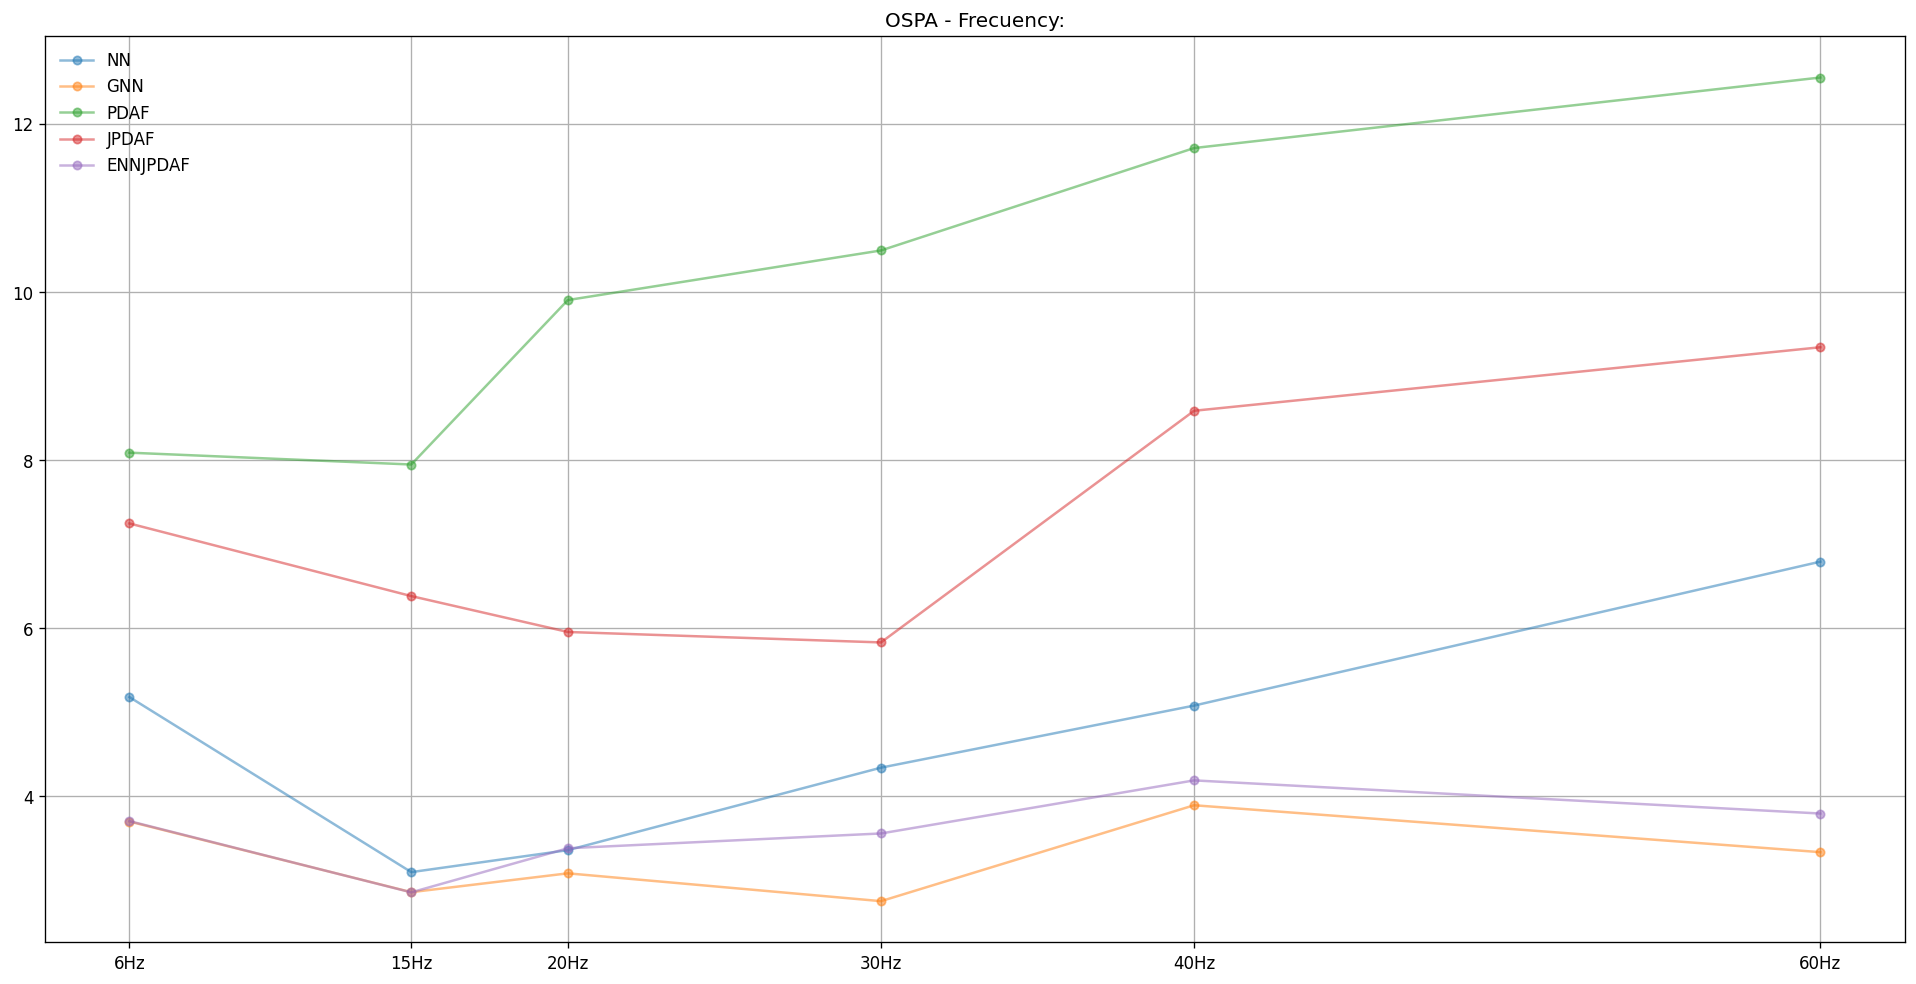

dataset_2_performance_measures.csv


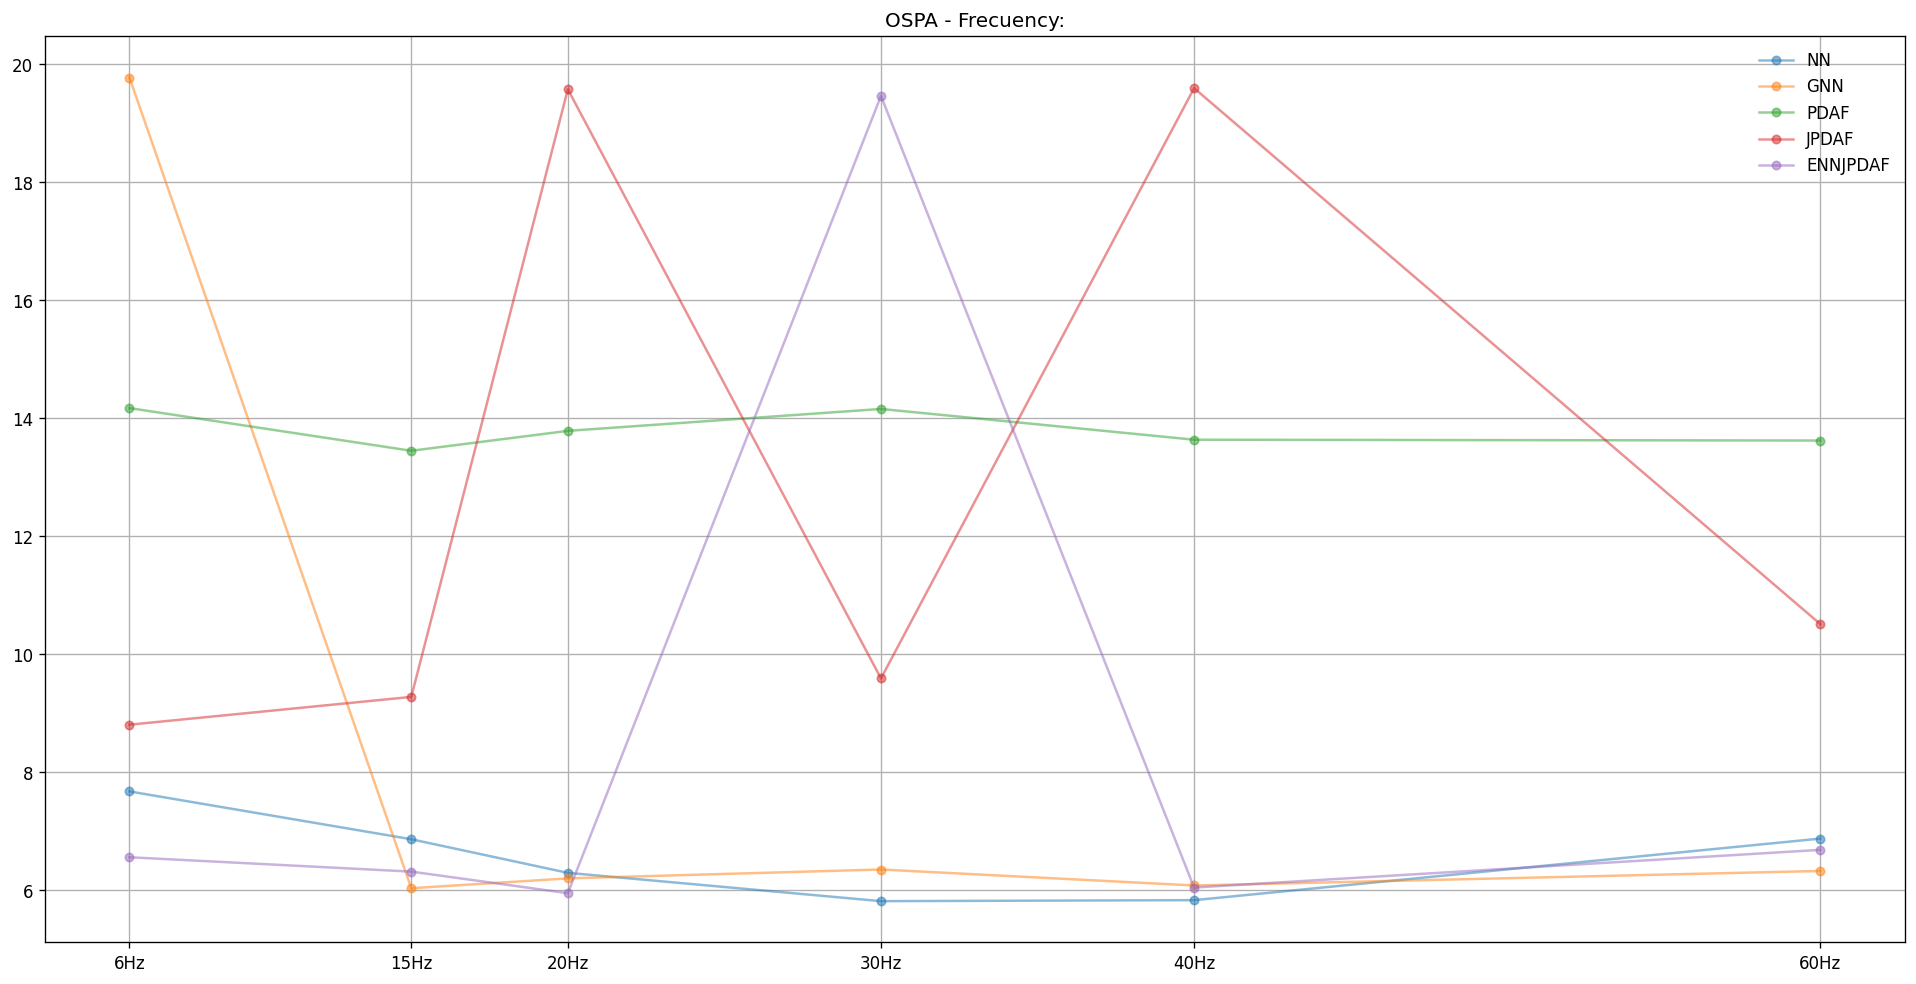

dataset_3_performance_measures.csv


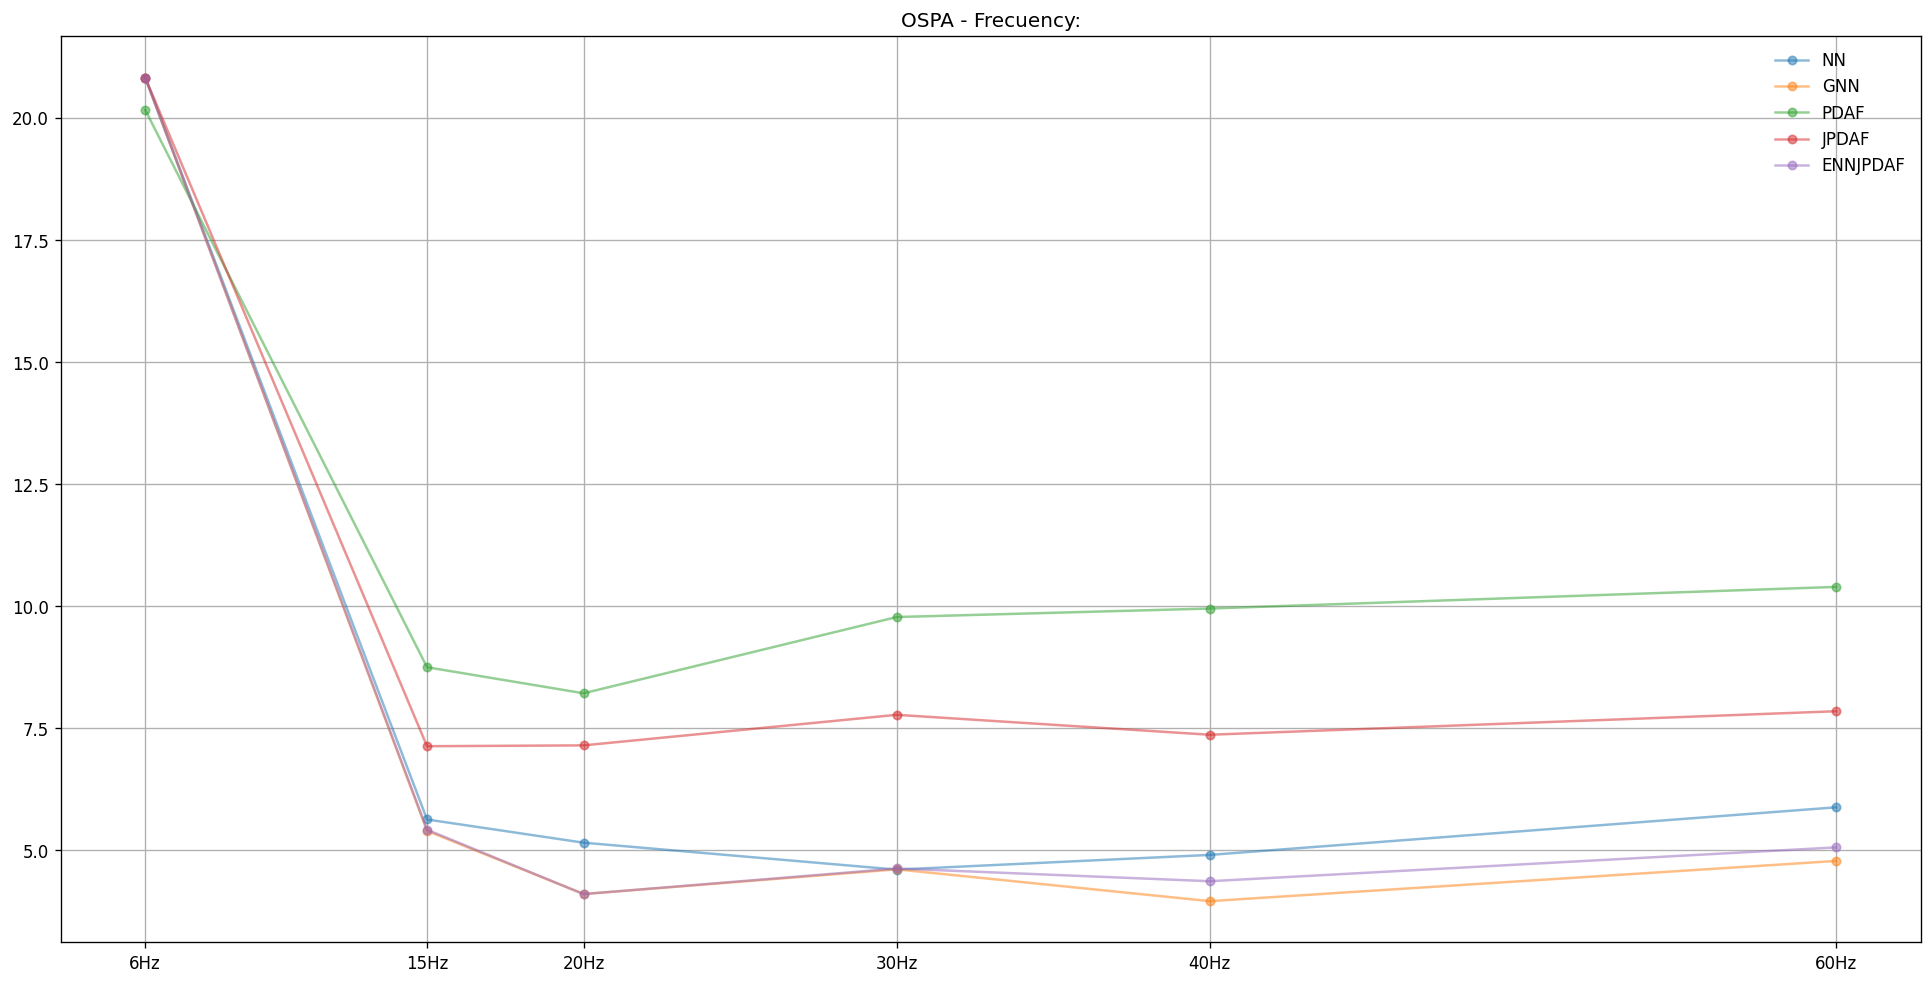

dataset_4_performance_measures.csv


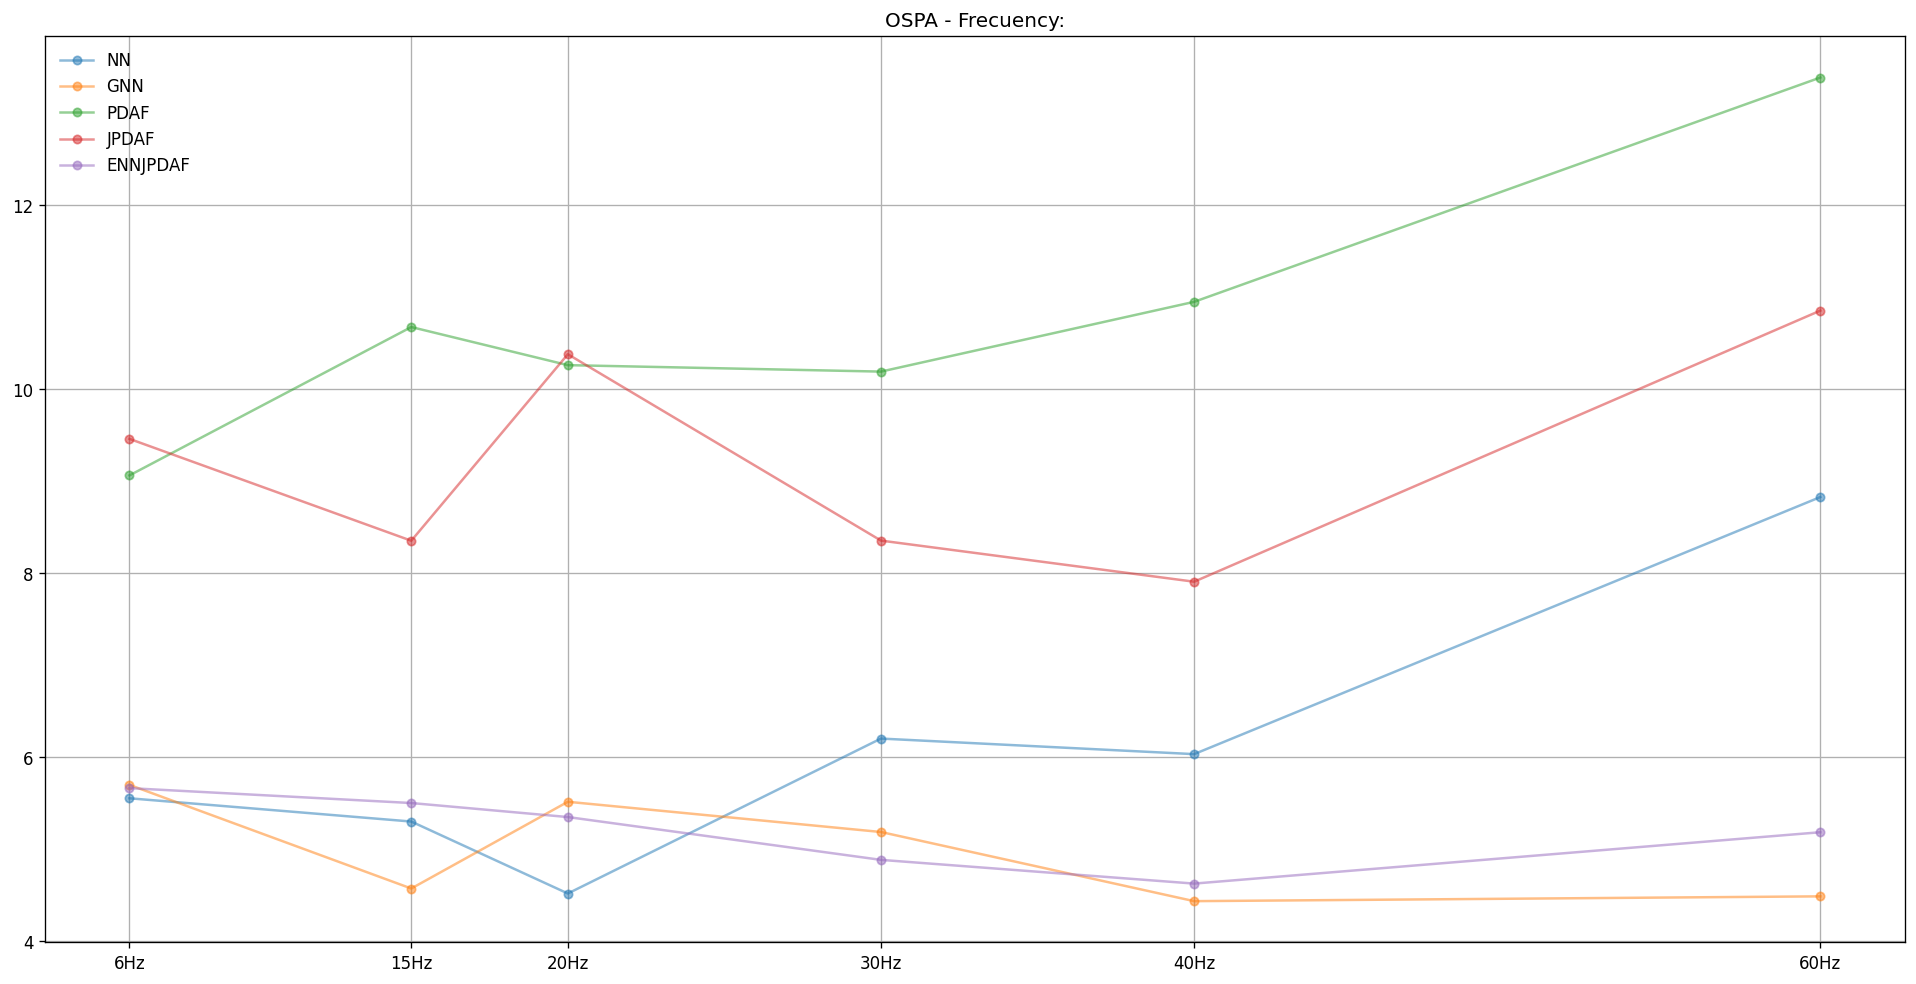

dataset_5_performance_measures.csv


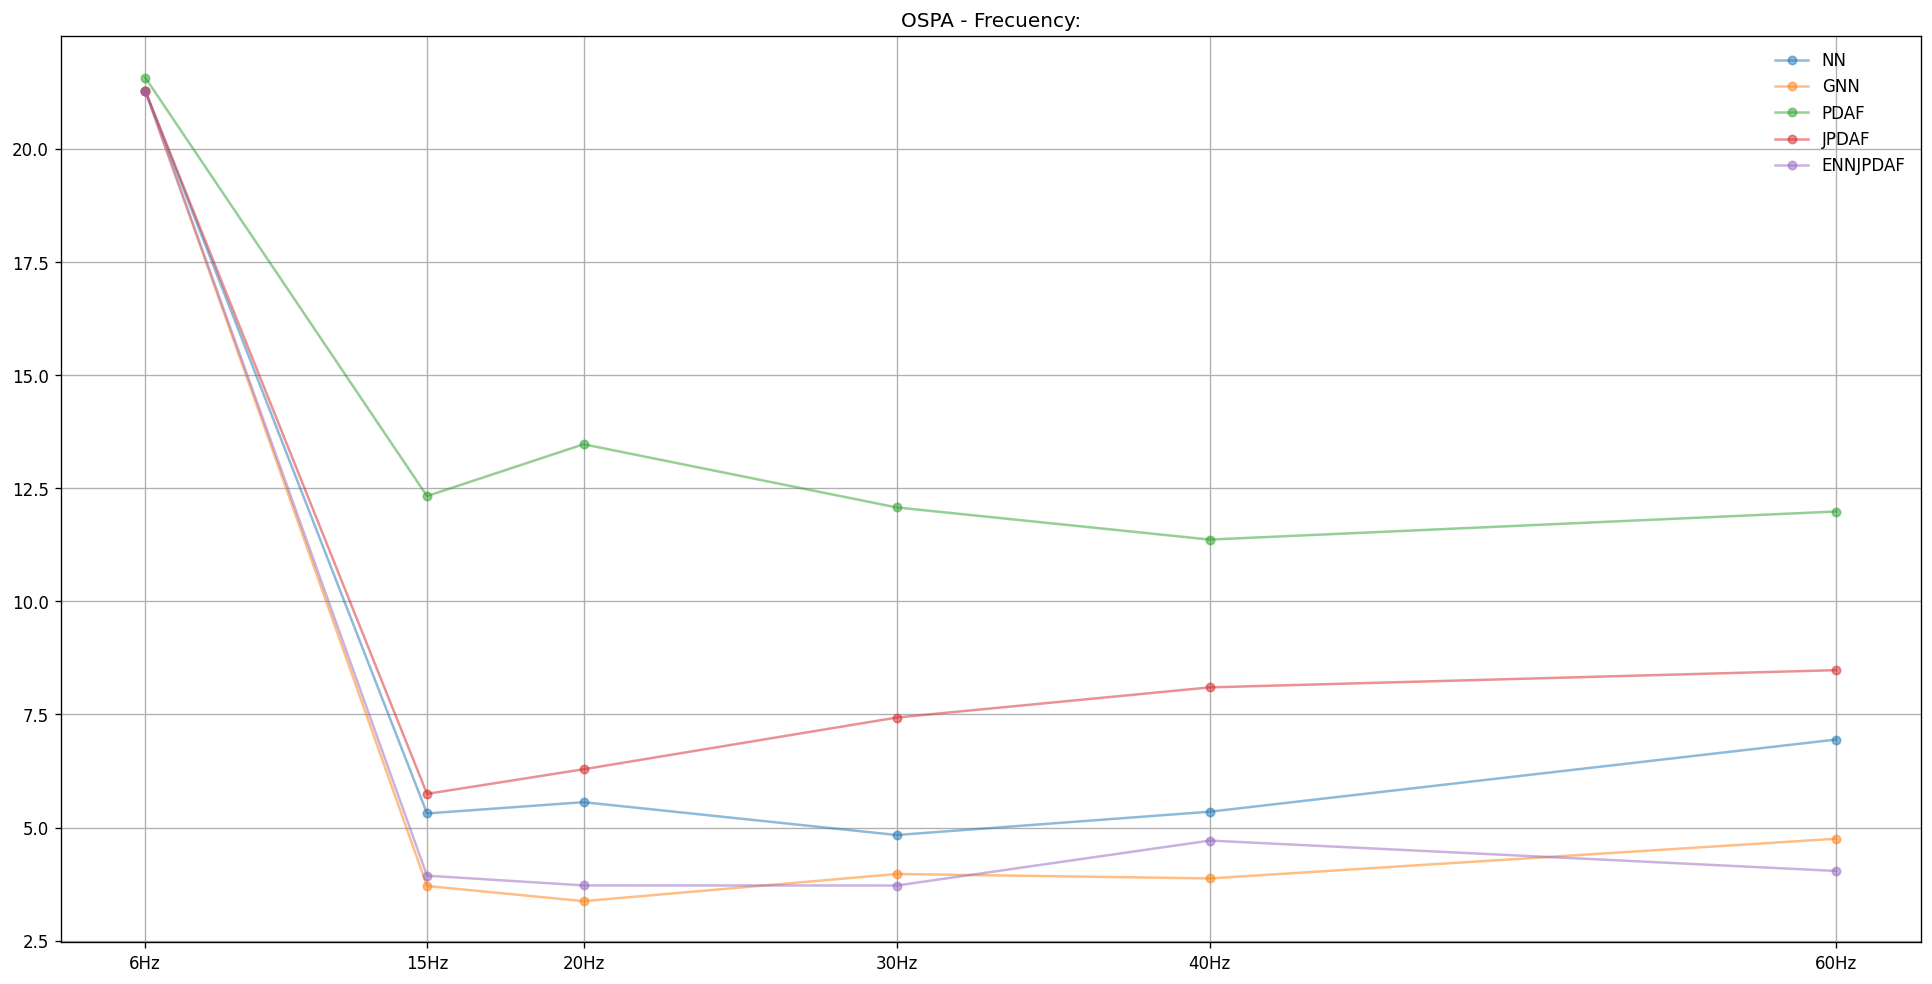

dataset_6_performance_measures.csv


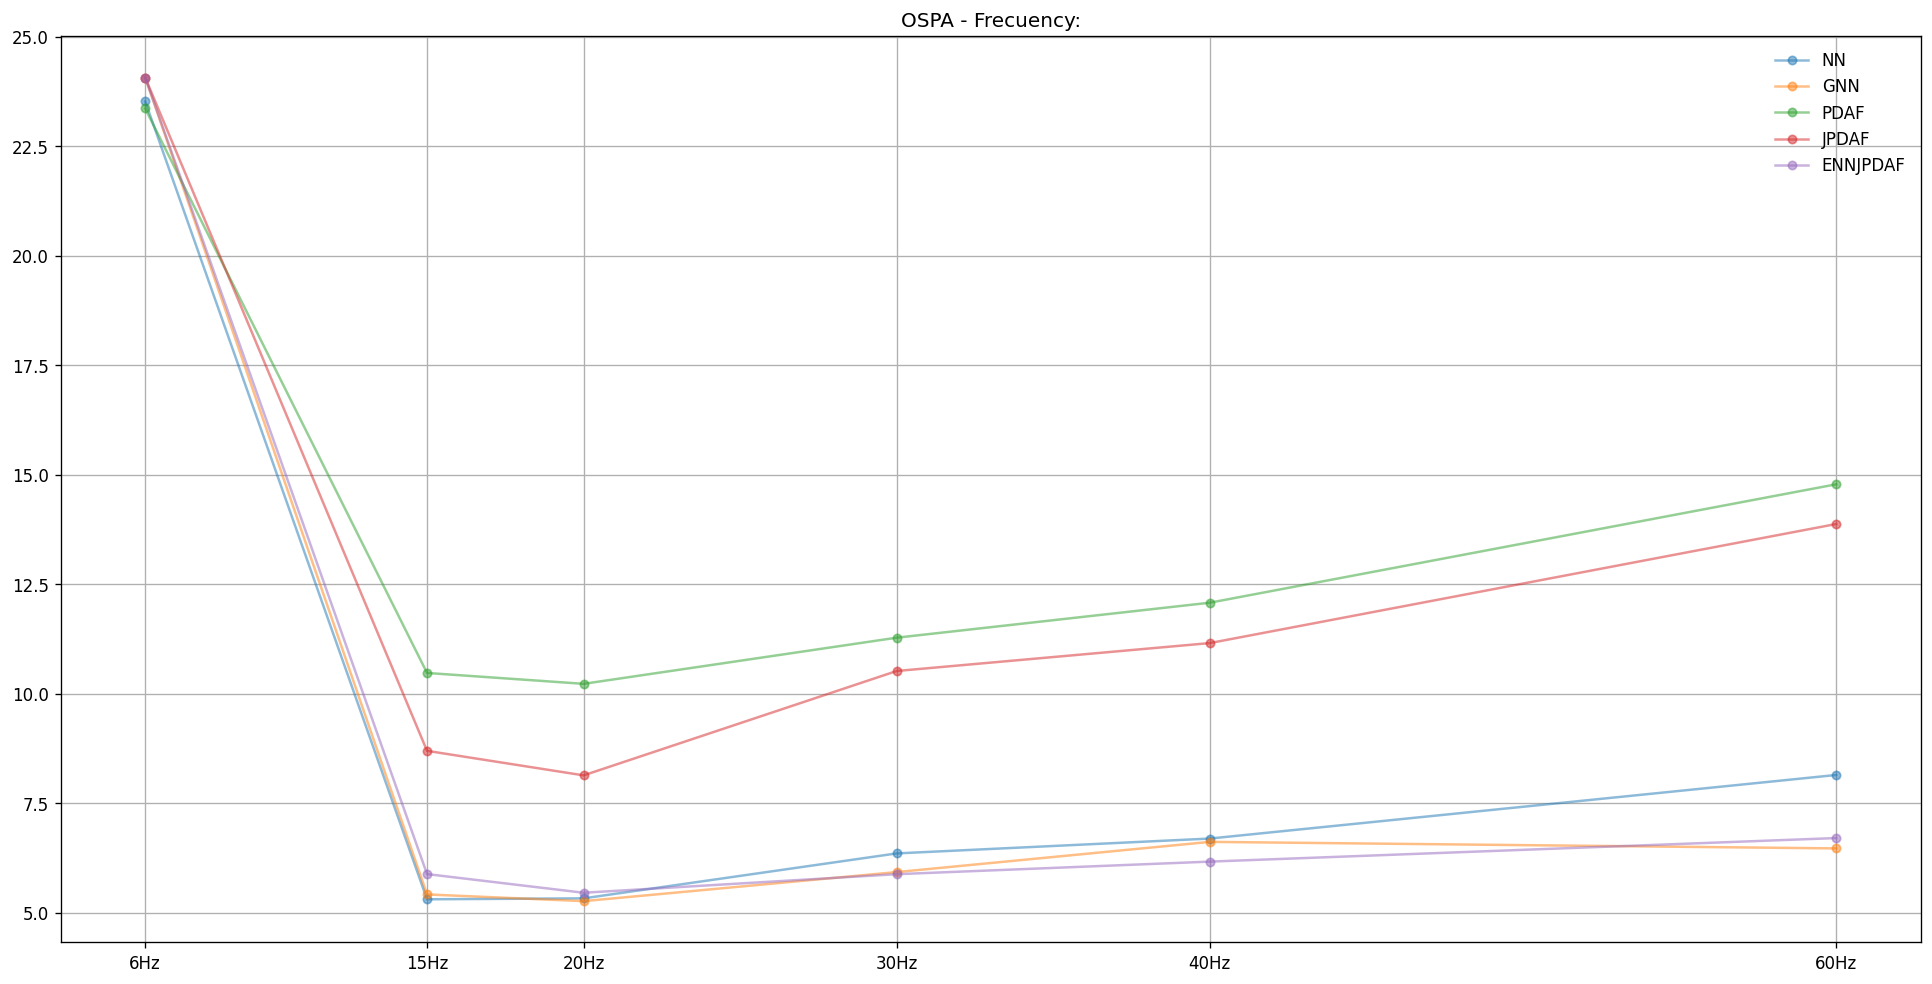

In [36]:
for k, results in enumerate(datasets_results):
    print(files[k])
    os.makedirs(os.path.join(datasets_dir, files[k].split(sep='.')[0]), exist_ok=True)

    plt.figure(figsize=(20, 10))
    for i, results_att in enumerate(results):
        results_att = results_att.sort_values(by=['Frecuency'])
        plt.plot(results_att['Frecuency'], results_att['OSPA'], marker='o', markersize=5,
                 label=results_att.index[0].split(sep='_')[1], alpha=0.5)
    plt.legend(frameon=False)
    plt.grid()
    plt.xticks(frecuencies_num, frecuencies) 
    plt.title('OSPA - Frecuency:')
    plt.savefig(os.path.join(datasets_dir, files[k].split(sep='.')[0], 'OSPA.png'))
    plt.show()

### JSC Tracks

dataset_1_performance_measures.csv


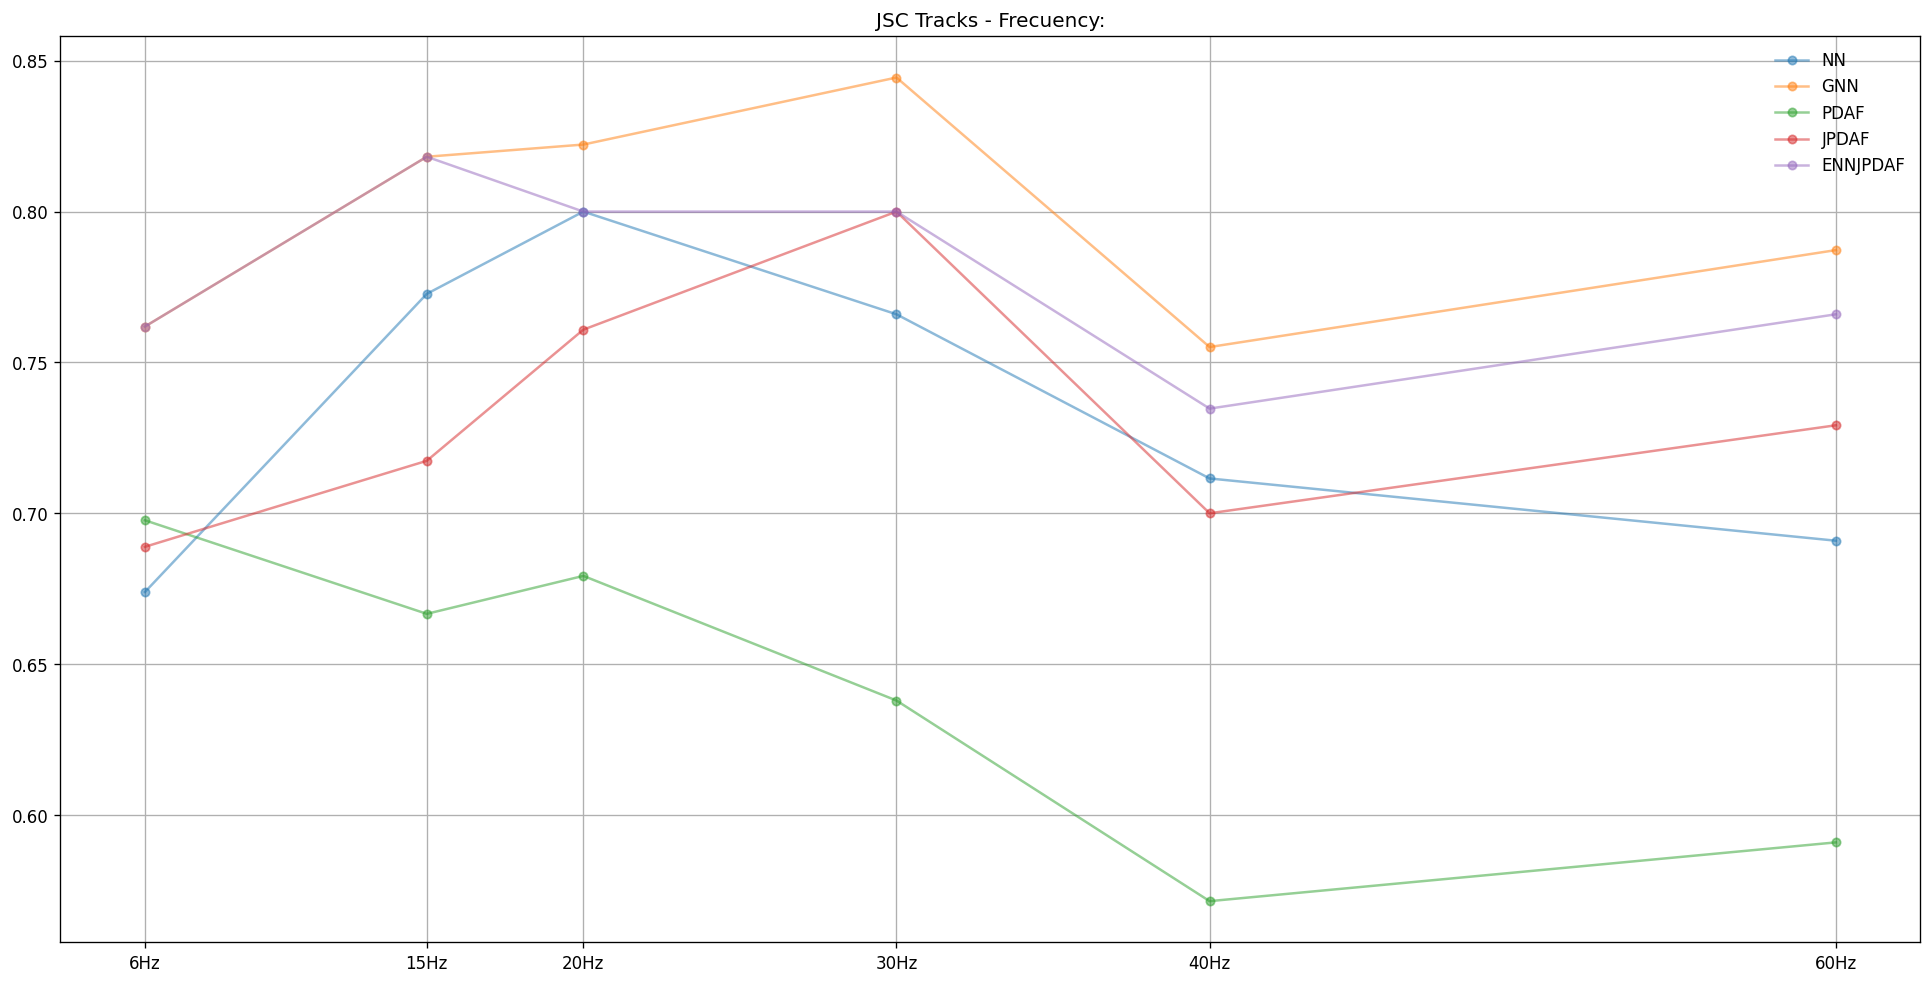

dataset_2_performance_measures.csv


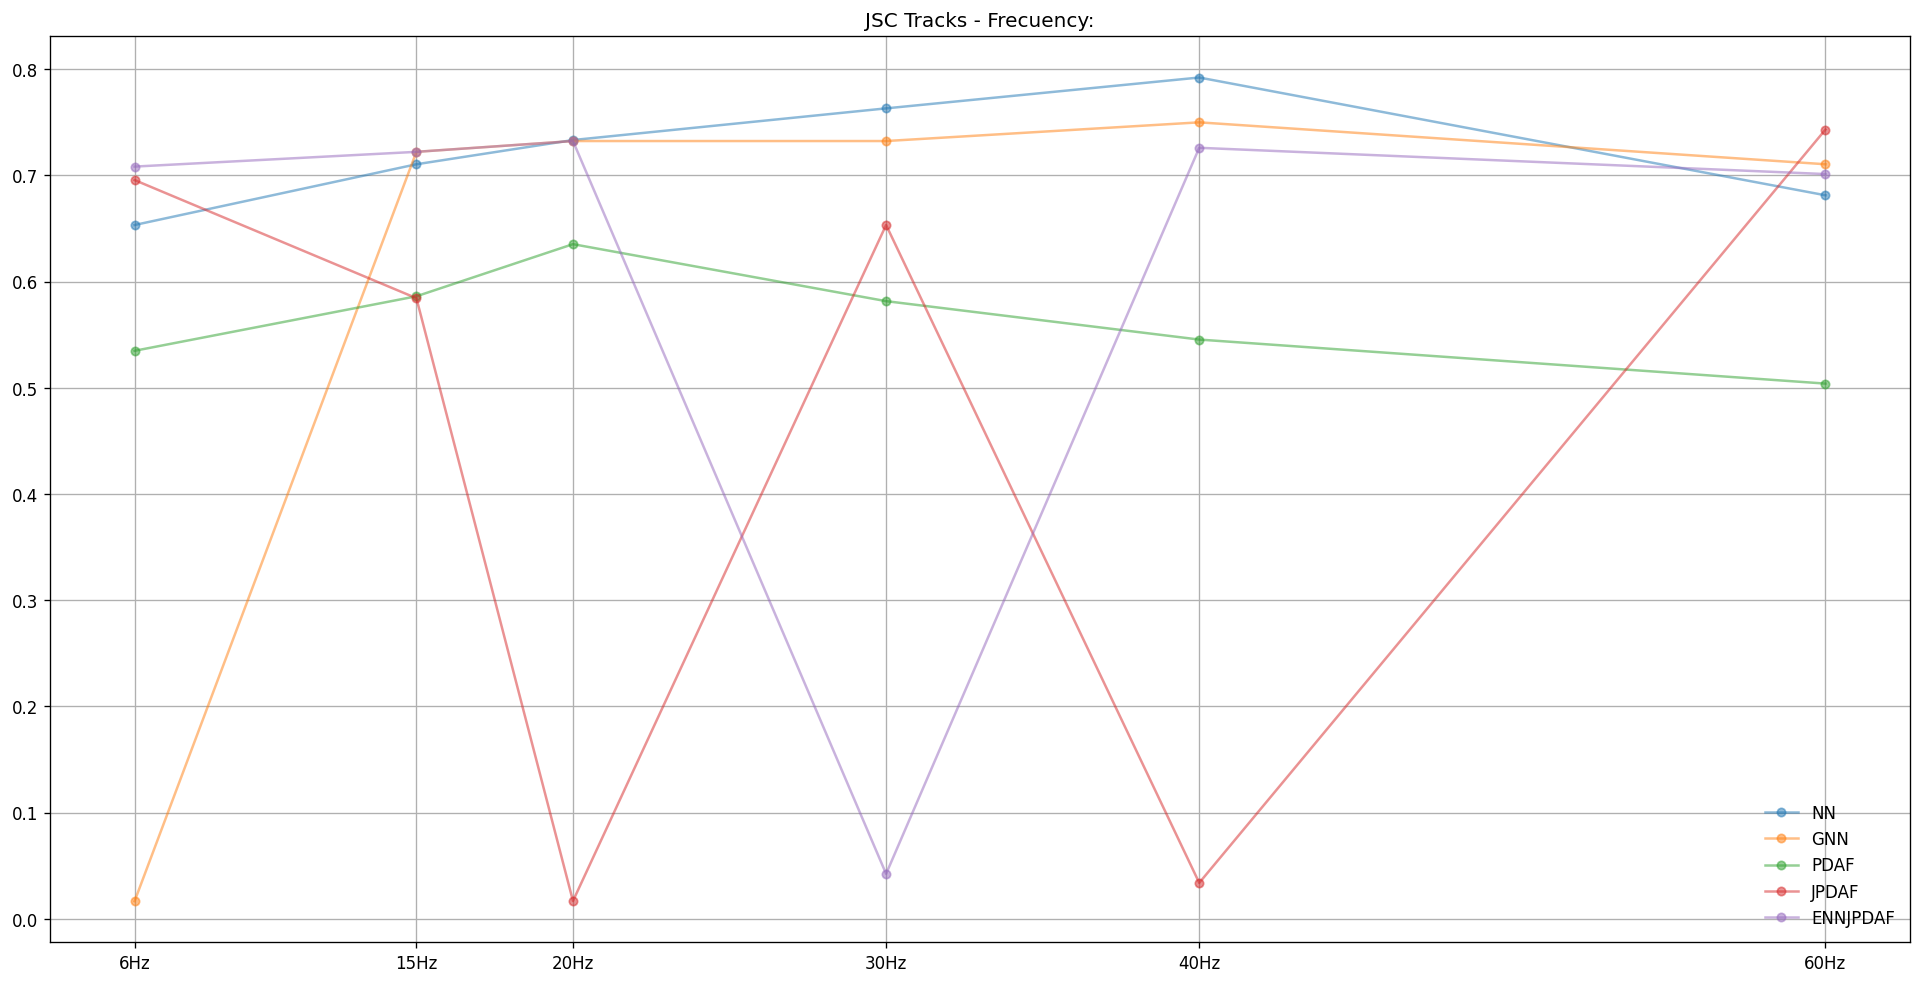

dataset_3_performance_measures.csv


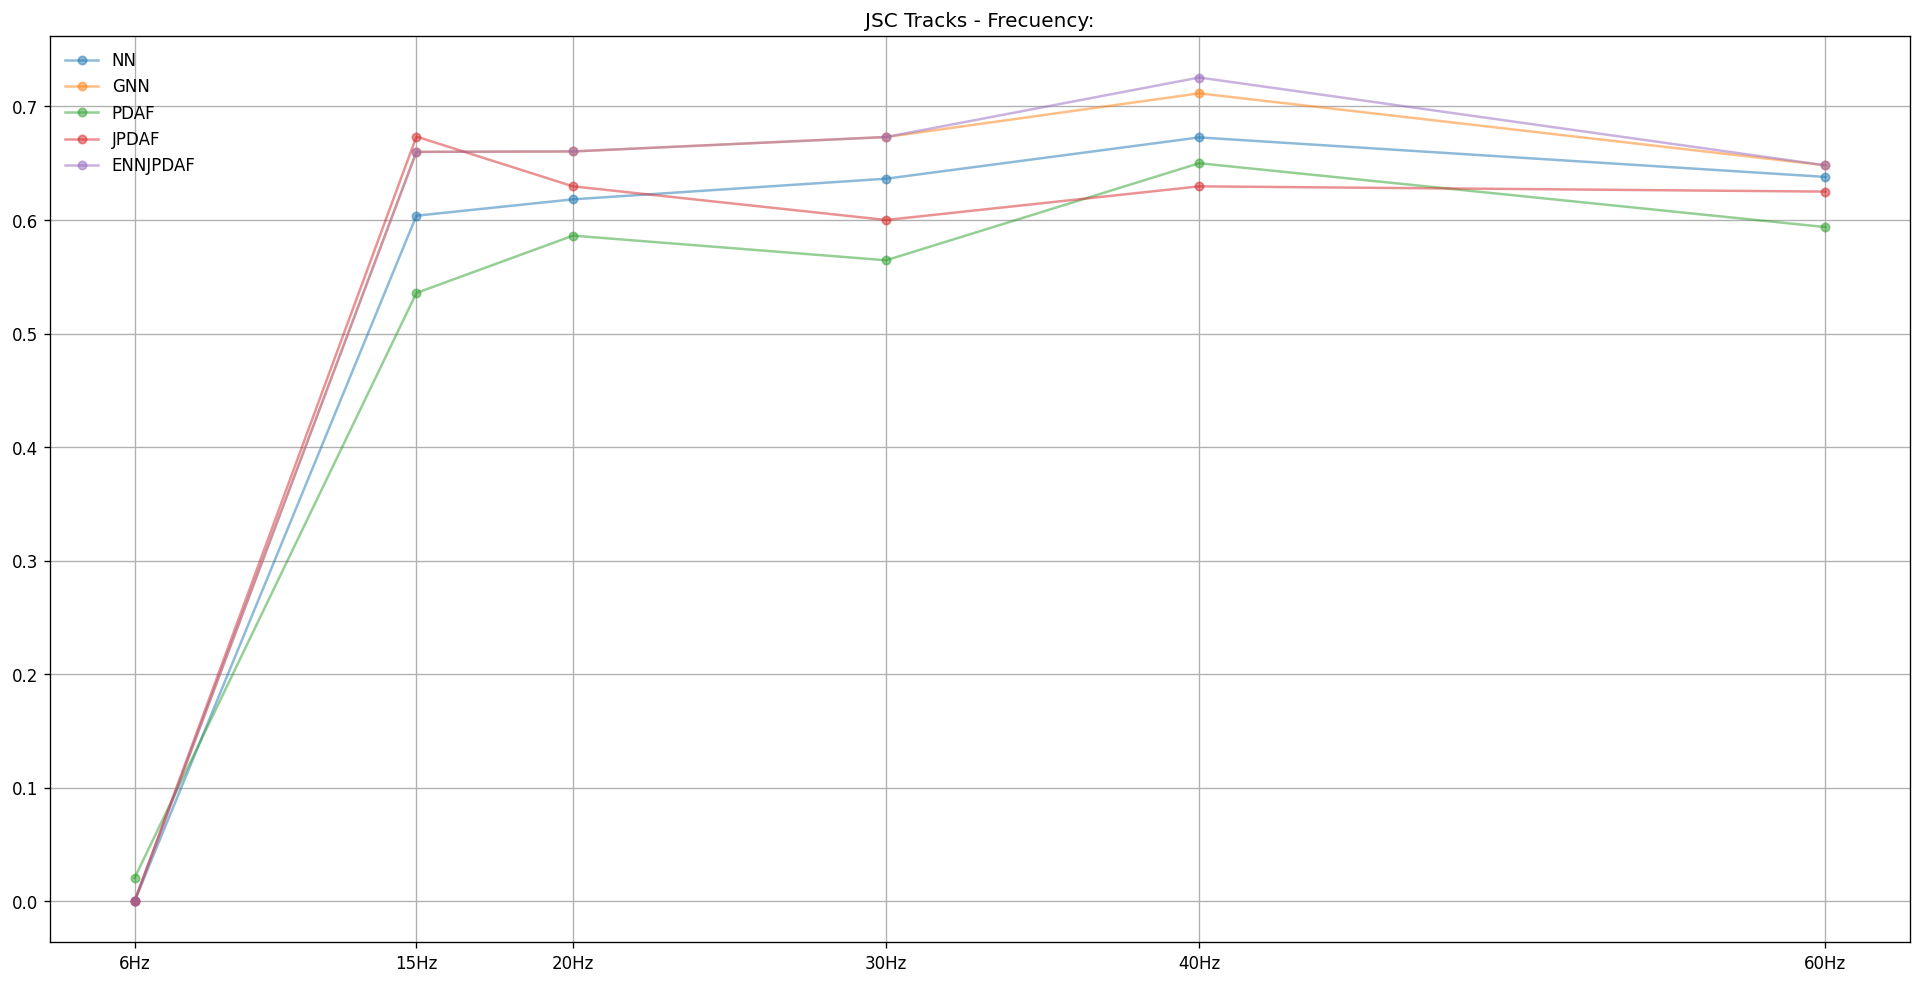

dataset_4_performance_measures.csv


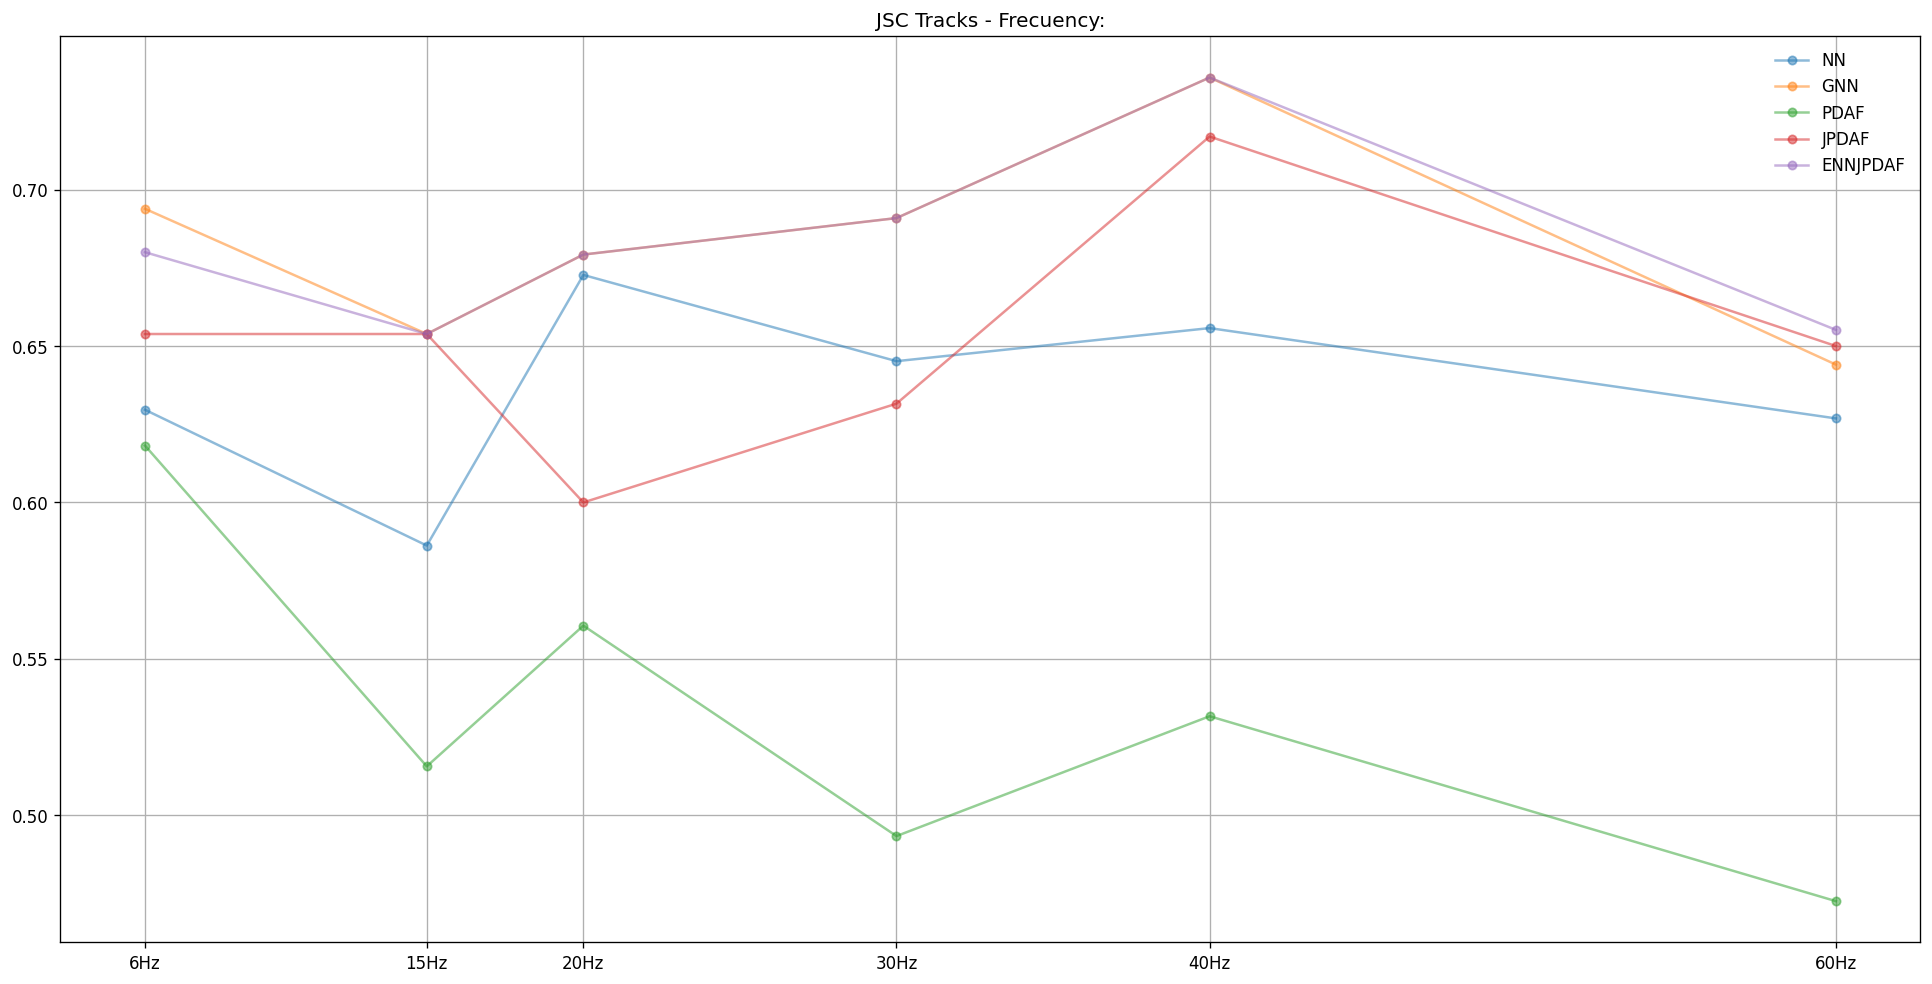

dataset_5_performance_measures.csv


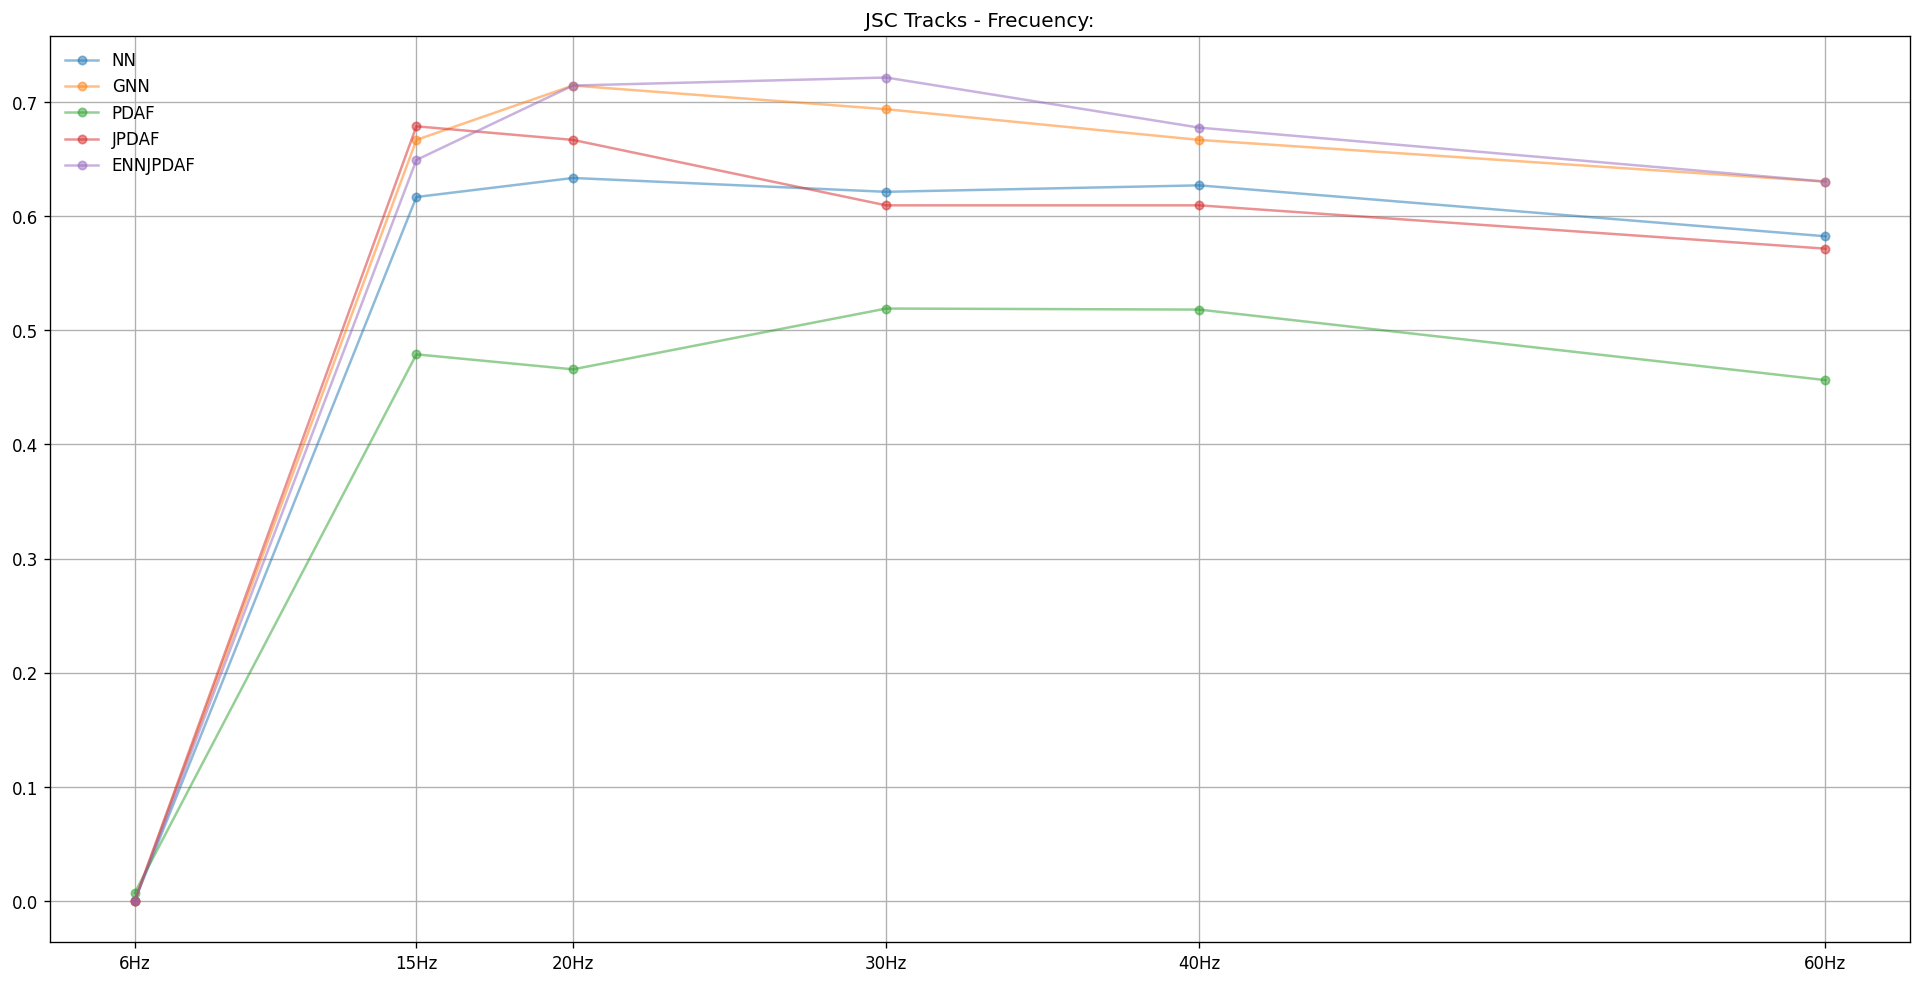

dataset_6_performance_measures.csv


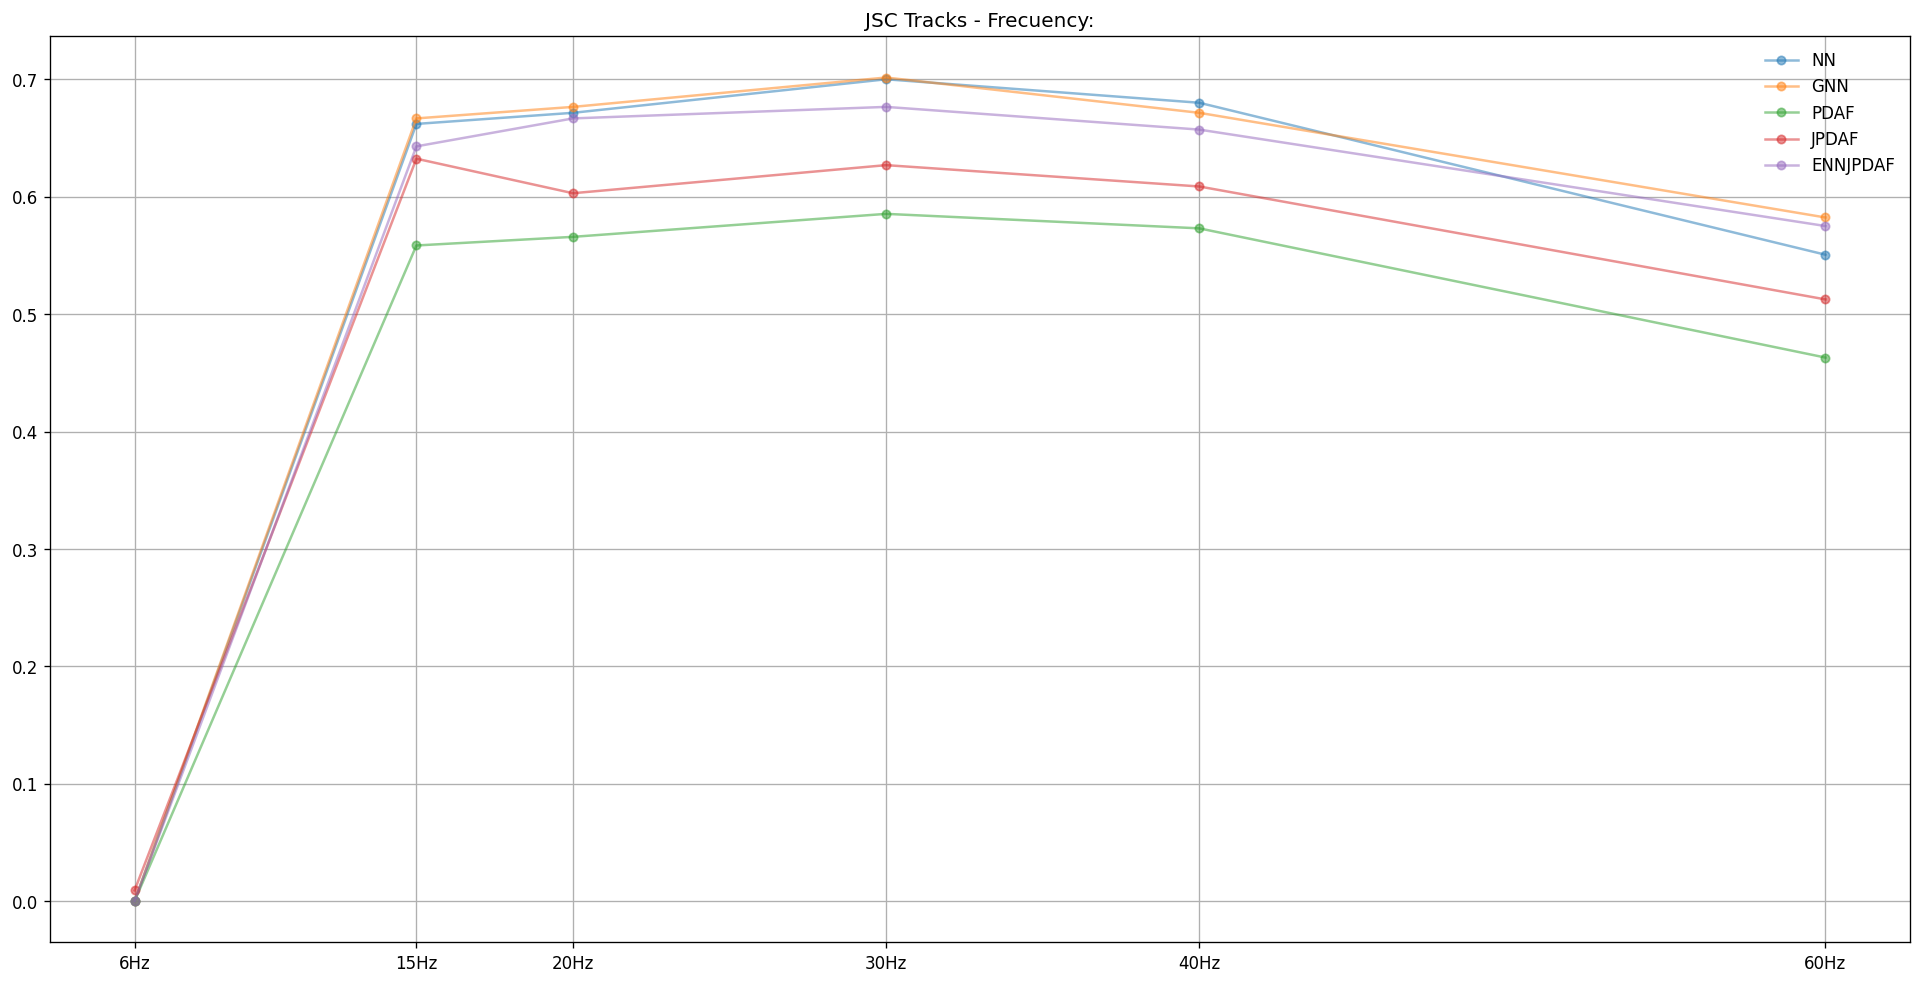

In [37]:
for k, results in enumerate(datasets_results):
    print(files[k])
    os.makedirs(os.path.join(datasets_dir, files[k].split(sep='.')[0]), exist_ok=True)
            
    plt.figure(figsize=(20, 10))
    for i, results_att in enumerate(results):
        results_att = results_att.sort_values(by=['Frecuency'])
        plt.plot(results_att['Frecuency'], results_att['JSC Tracks'], marker='o', markersize=5,
                 label=results_att.index[0].split(sep='_')[1], alpha=0.5)
    plt.legend(frameon=False)
    plt.grid()
    plt.xticks(frecuencies_num, frecuencies) 
    plt.title('JSC Tracks - Frecuency:')
    plt.savefig(os.path.join(datasets_dir, files[k].split(sep='.')[0], 'JSC_Tracks.png'))
    plt.show()

### JSC Positions

dataset_1_performance_measures.csv


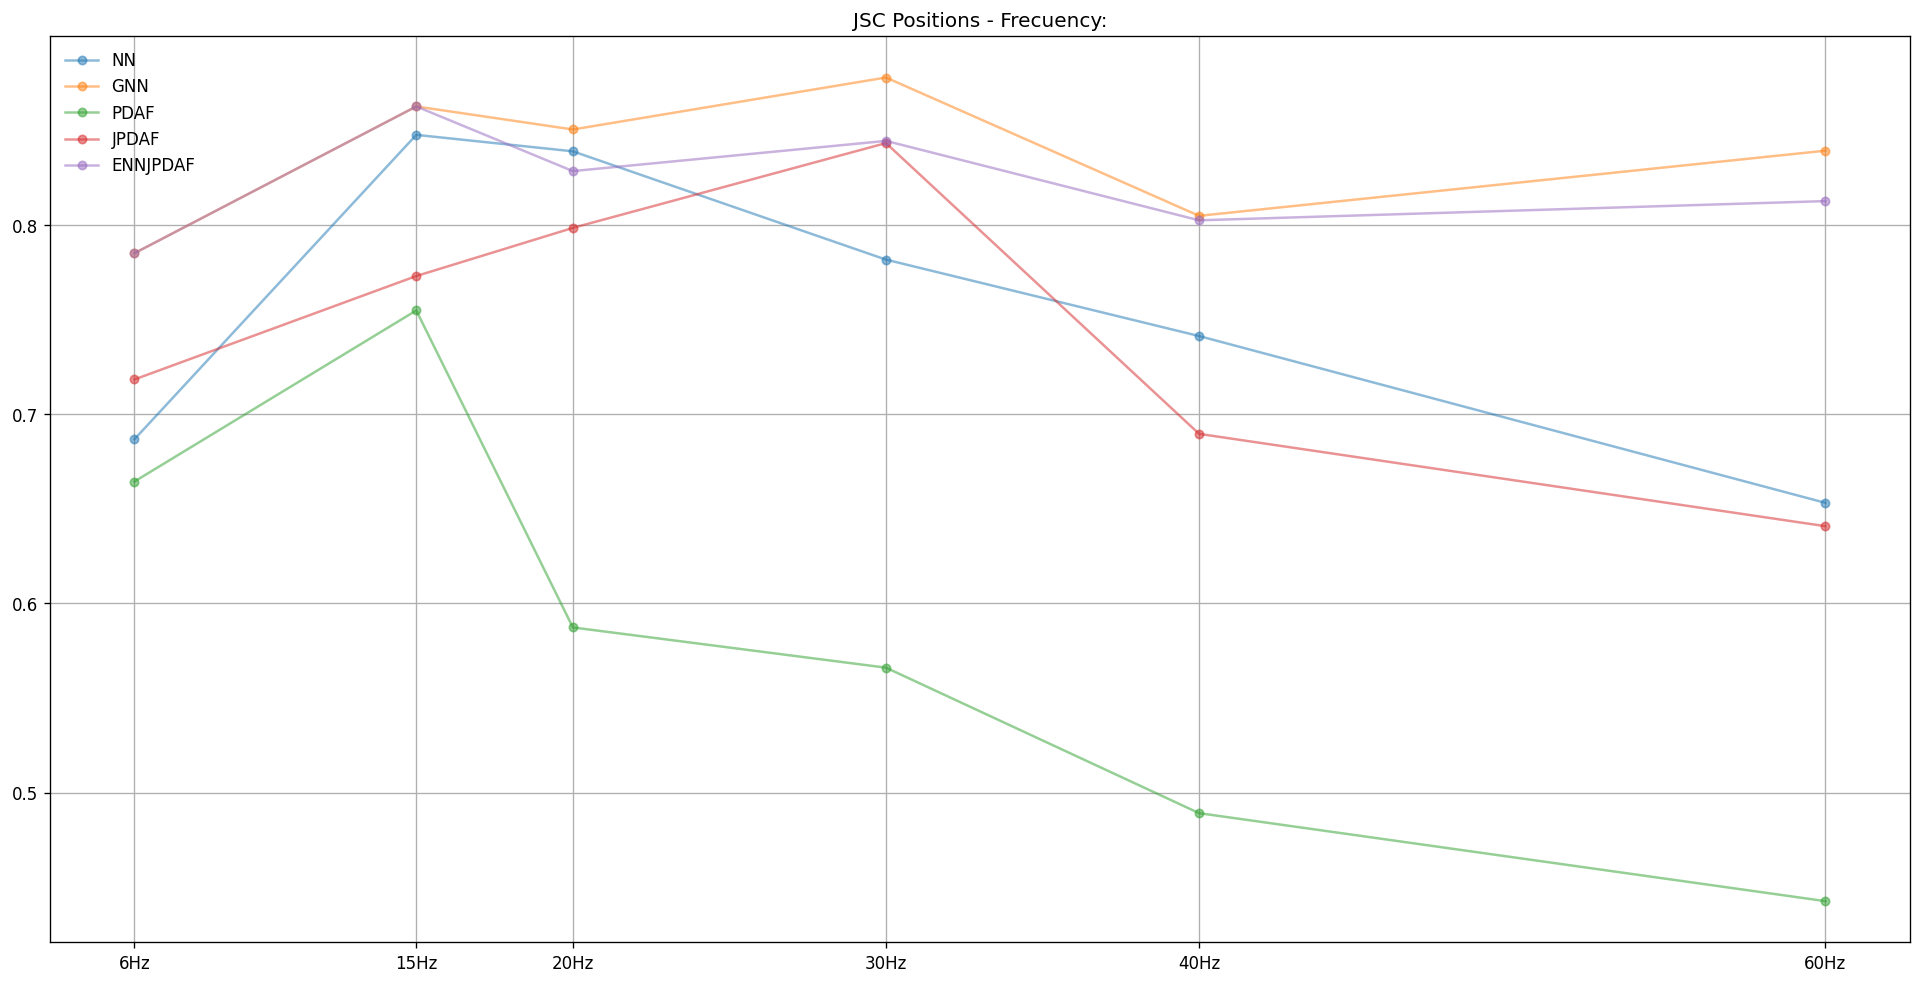

dataset_2_performance_measures.csv


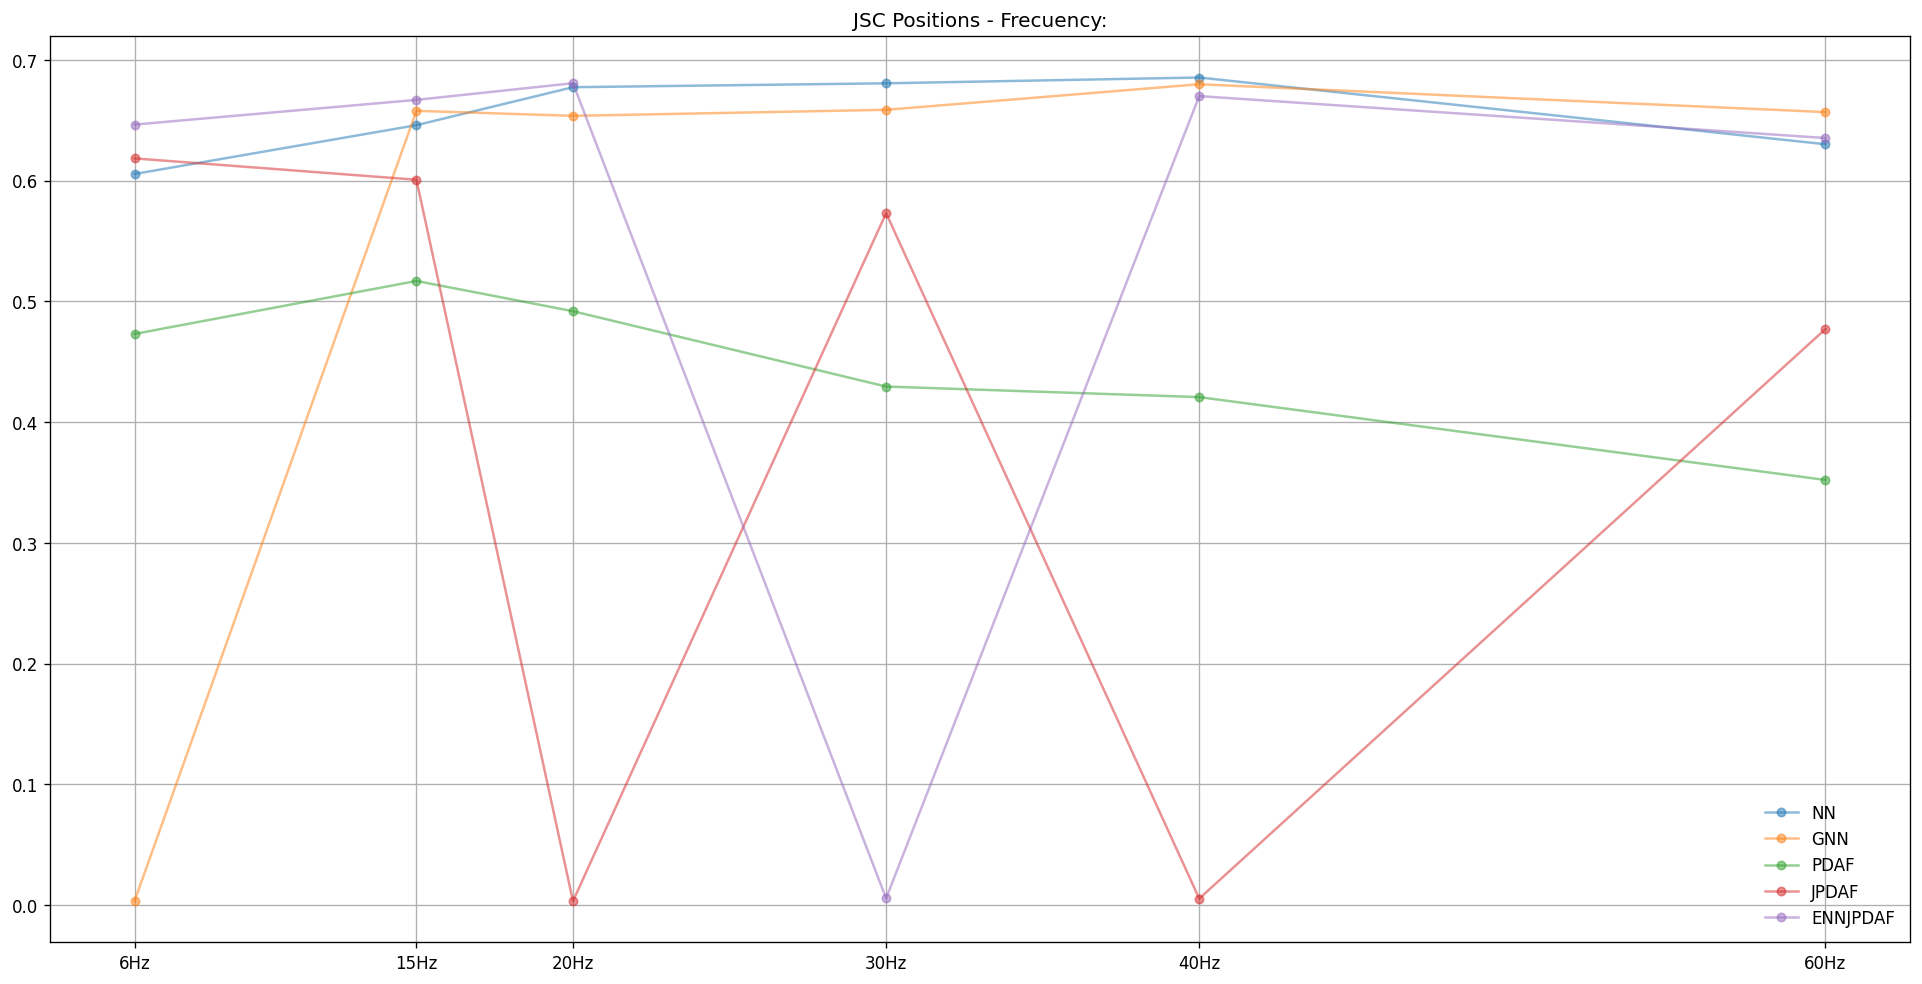

dataset_3_performance_measures.csv


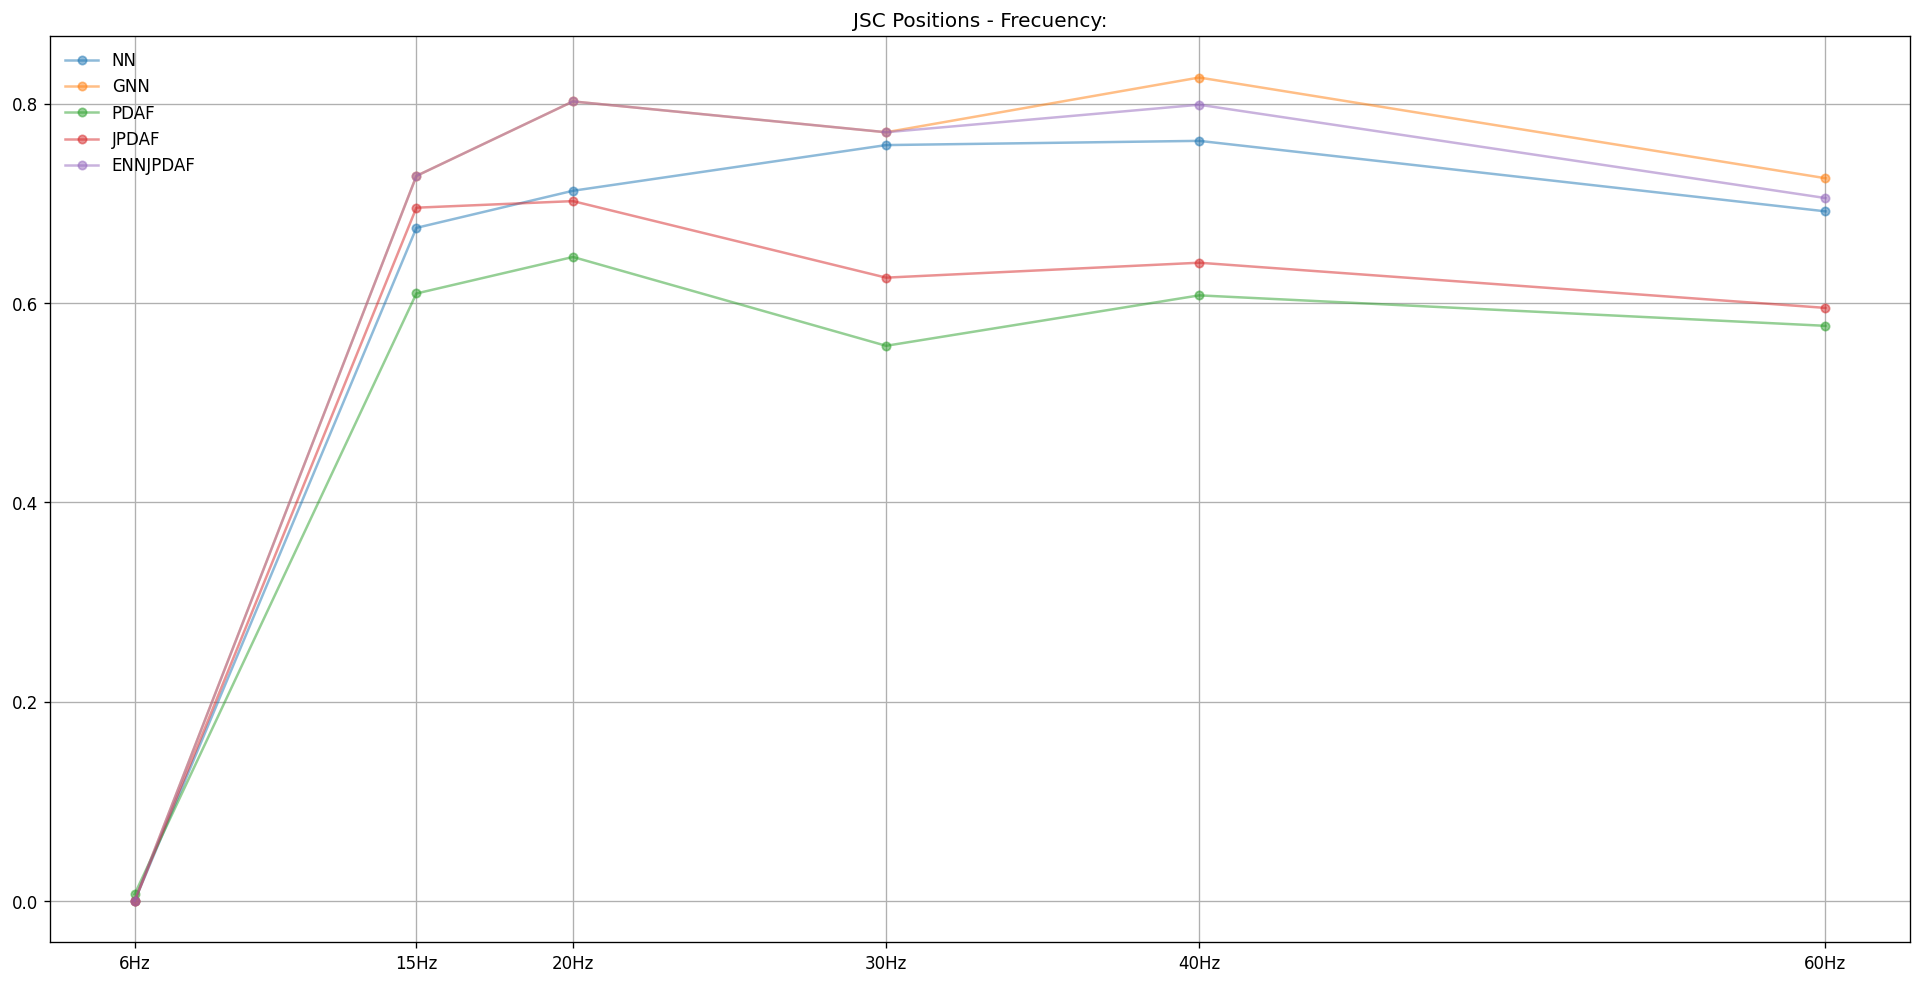

dataset_4_performance_measures.csv


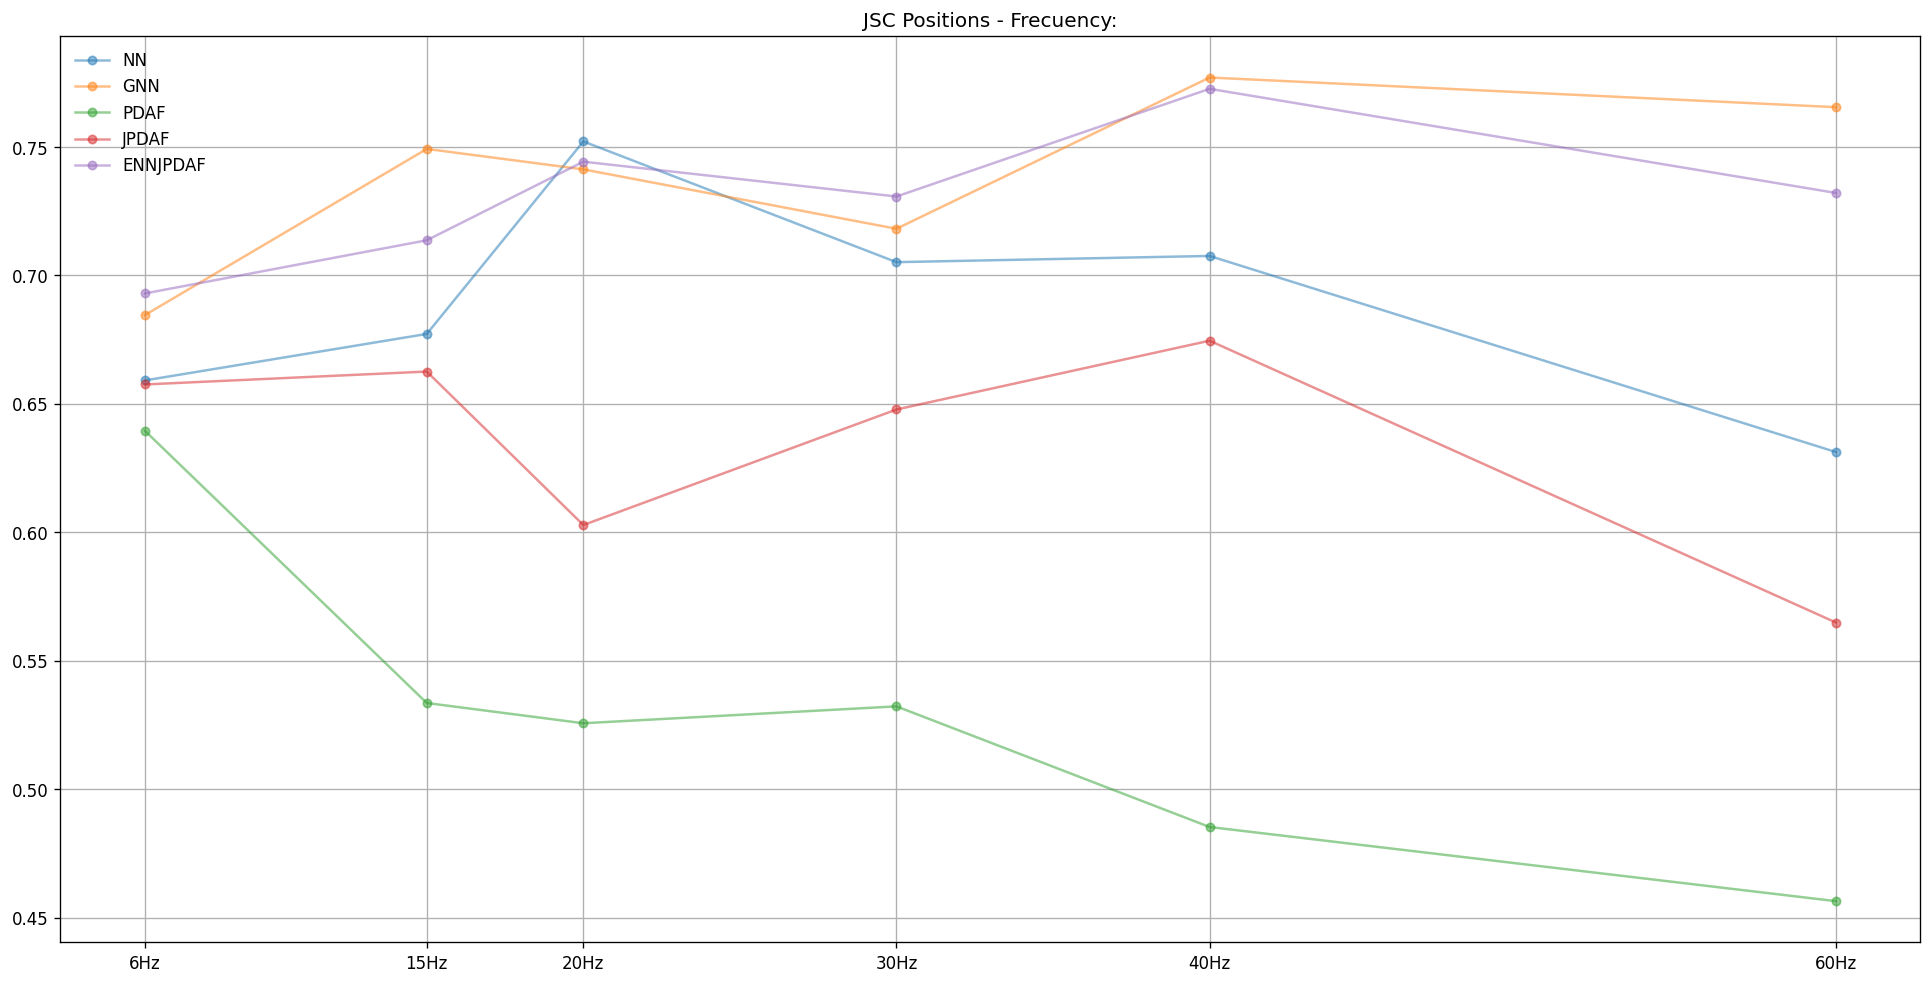

dataset_5_performance_measures.csv


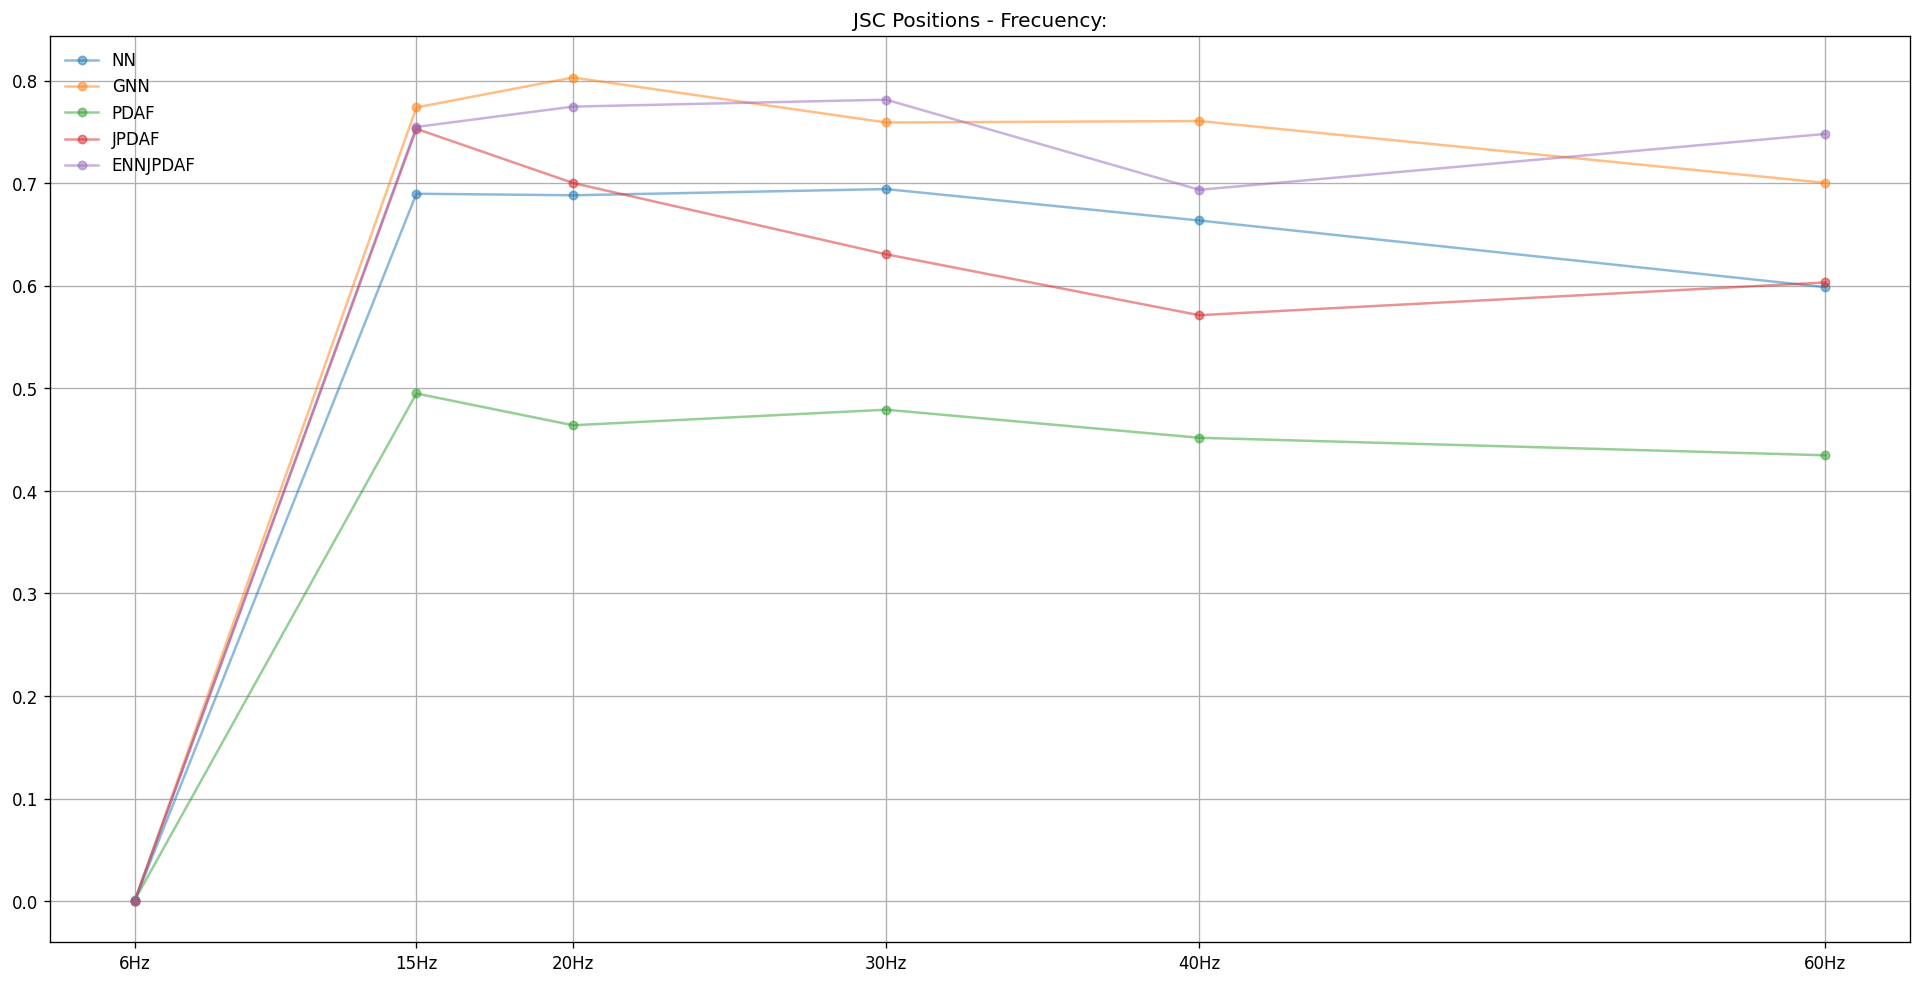

dataset_6_performance_measures.csv


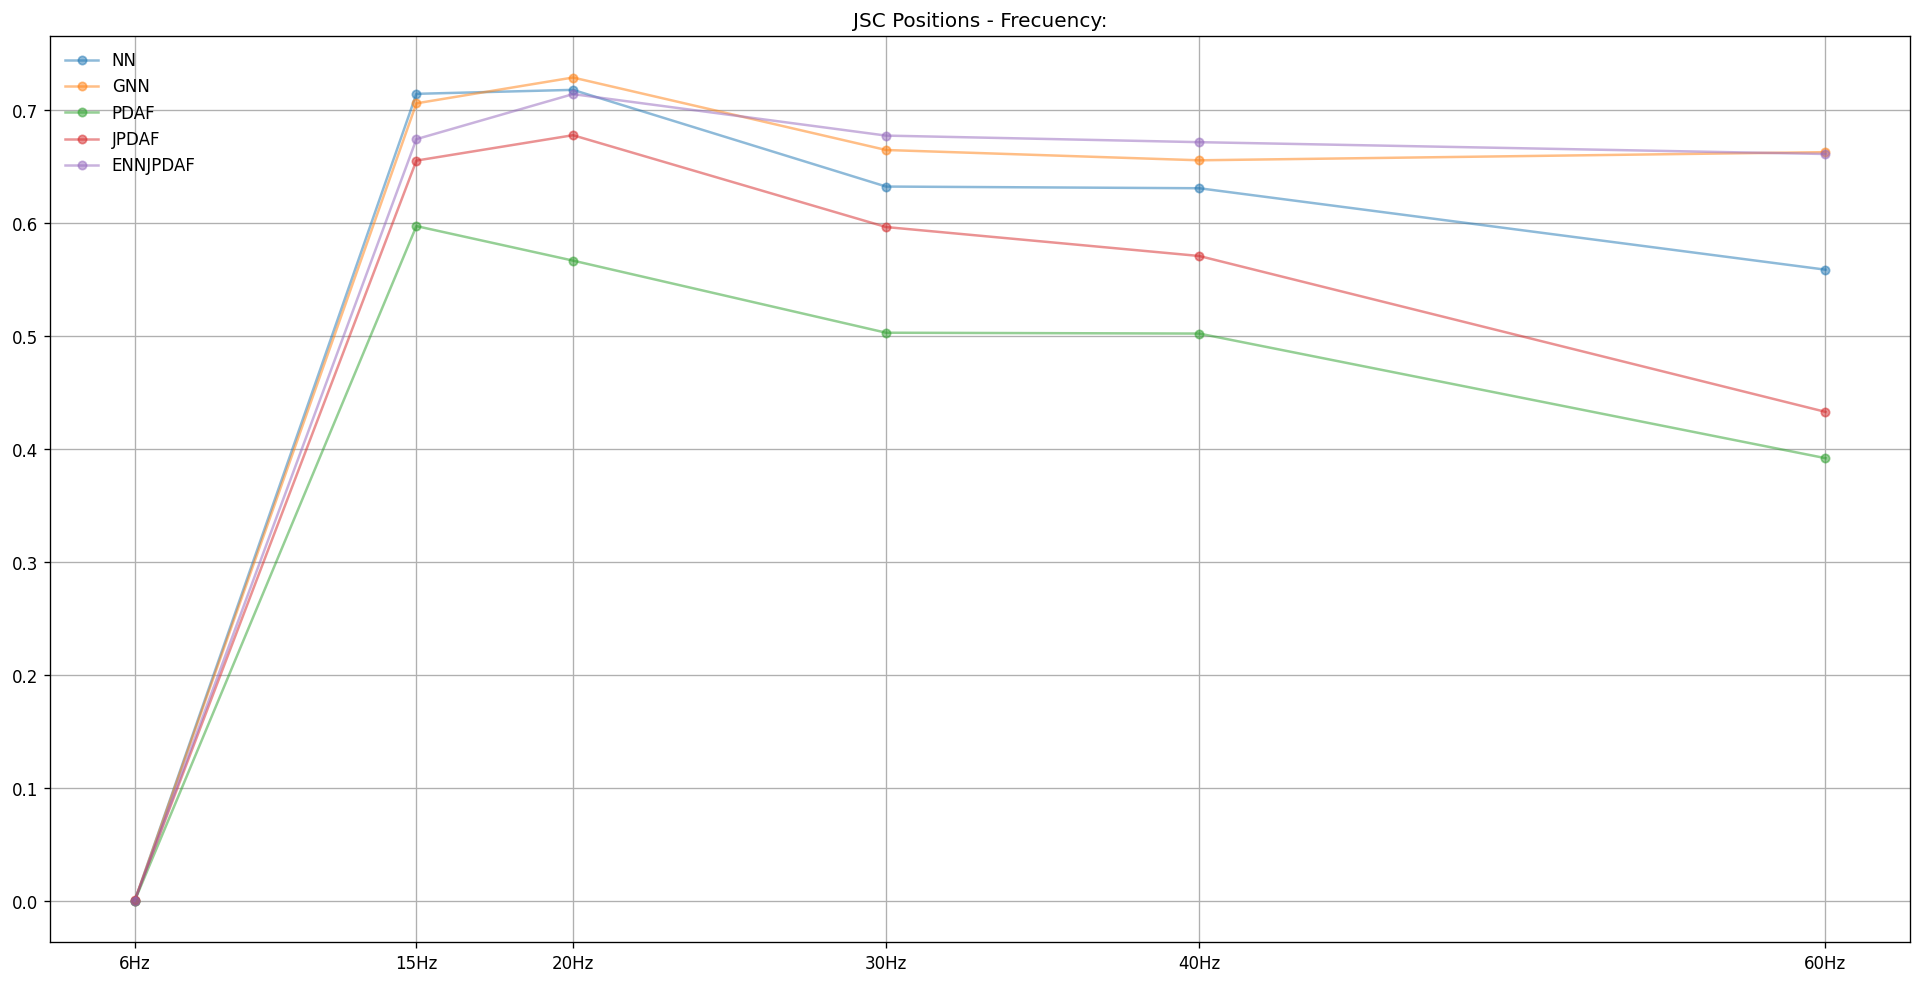

In [38]:

for k, results in enumerate(datasets_results):
    print(files[k])
    os.makedirs(os.path.join(datasets_dir, files[k].split(sep='.')[0]), exist_ok=True)

    plt.figure(figsize=(20, 10))
    for i, results_att in enumerate(results):
        results_att = results_att.sort_values(by=['Frecuency'])
        plt.plot(results_att['Frecuency'], results_att['JSC Positions'], marker='o', markersize=5,
                 label=results_att.index[0].split(sep='_')[1], alpha=0.5)
    plt.legend(frameon=False)
    plt.grid()
    plt.xticks(frecuencies_num, frecuencies) 
    plt.title('JSC Positions - Frecuency:')
    plt.savefig(os.path.join(datasets_dir, files[k].split(sep='.')[0], 'JSC_Positions.png'))
    plt.show()